## INDEX

0. [Introduction](#introduction)
1. [Importing libraries](#importing-libraries)
2. [Data collection](#data-collection)
3. [Dataset selection](#dataset-selection)
    - [Selected dataset](#selected-dataset)
4. [Data cleaning](#data-cleaning)
5. [Deep dive](#deep-dive)
    - [Class distribution](#class-distribution)
    - [Categorical variables](#categorical-variables)
        - [Categorical var analysis](#categorical-var-analysis)
    - [Continuous variables](#continuous-variables)
        - [Continuous var analysis](#continuous-var-analysis)
6. [Deep Dive part II](#deep-dive-part-ii)
    - [Correlation map](#correlation-map)
    - [Correlation insights](#correlation-insights)
    - [Variance Inflation Factor VIF](#variance-inflation-factor-vif)
        - [Multicollinearity VIF Results](#multicollinearity-vif-results)
    - [Statistical Feature Selection](#statistical-feature-selection)
        - [Chi-squared test](#chi-squared-test)
        - [ANOVA F-test](#anova-f-test)
        - [Tests results](#tests-results)
        - [Feature Importance Ranking Summary](#feature-importance-ranking-summary)
    - [Outliers exploration](#outliers-exploration)
        - [Outliers interpretation](#outliers-interpretation)
        - [Handling outliers](#handling-outliers)
7. [Model Deployment](#model-deployment) 
    - [Data preparation](#data-preparation)
        - [Feature and Targer separation](#feature-and-targer-separation)
        - [Standard Scaling](#standard-scaling)
    - [Logistic Regression Models](#logistic-regression-models)
        - [Logistic Regression Model I](#logistic-regression-model-i)
            - [Logistic Regression Model I training](#logistic-regression-model-i-training)
            - [Logistic Regression Model I evaluation](#logistic-regression-model-i-evaluation)
            - [Logistic Regression Model I results sumary and conclusion](#logistic-regression-model-i-results-sumary-and-conclusion)
        - [Logistic Regression Model II](#logistic-regression-model-ii)
            - [Logistic Regression Model II retraining](#logistic-regression-model-ii-retraining)
            - [Logistic Regression Model II evaluation](#logistic-regression-model-ii-evaluation)
            - [Logistic Regression Model II results sumary and conclusion](#logistic-regression-model-ii-results-sumary-and-conclusion)
    - [Tree Based Models](#tree-based-models)
        - [Random Forest Classifier](#random-forest-classifier)
            - [Random Forest Classifier training](#random-forest-classifier-training)
            - [Random Forest Classifier evaluation](#random-forest-classifier-evaluation)
            - [Random Forest Classifier results sumary and conclusion](#random-forest-classifier-results-sumary-and-conclusion)
        - [LightGBM Model](#lightgbm-model)
            - [LightGBM Model training](#lightgbm-model-training)
            - [LightGBM Model evaluation](#lightgbm-model-evaluation)
            - [LightGBM Model results sumary and conclusion](#lightgbm-model-results-sumary-and-conclusion)
8. [Saving Chosen Model](#saving-chosen-model)
9. [Saving Scaler](#saving-scaler)
10. [Saving Features](#saving-features)

## Introduction

**About Dataset**

Context:

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

Content:

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This dataset contains 3 files:

1. **diabetes_012_health_indicators_BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables

2. **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is balanced.

3. **diabetes_binary_health_indicators_BRFSS2015.csv** is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

Explore some of the following research questions:

- Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
- Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

## Importing libraries

Back to [Index](#index)

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

## Data collection
Back to [Index](#index)

The dataset is from Kaggle:

- Link of the dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

The dataset contains 3 csv files:

1. diabetes_binary_5050split_health_indicators_BRFSS2015.csv
2. diabetes_012_health_indicators_BRFSS2015.csv
3. diabetes_binary_health_indicators_BRFSS2015.csv

In [2]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
#pd.options.display.float_format = '{:,.2f}'.format
print("Path to dataset files:", path)

Path to dataset files: /home/vscode/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [3]:
files = os.listdir(path)
print("Archivos en el dataset:", files)

Archivos en el dataset: ['diabetes_binary_5050split_health_indicators_BRFSS2015.csv', 'diabetes_012_health_indicators_BRFSS2015.csv', 'diabetes_binary_health_indicators_BRFSS2015.csv']


## Dataset selection
Back to [Index](#index)

In [4]:
dataset_path = os.path.join(path, "diabetes_binary_health_indicators_BRFSS2015.csv")
data = pd.read_csv(dataset_path)
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [5]:
dataset_path = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data_2 = pd.read_csv(dataset_path)
data_2.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [6]:
dataset_path = os.path.join(path, "diabetes_012_health_indicators_BRFSS2015.csv")
data_3 = pd.read_csv(dataset_path)
data_3.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [7]:
print(f'diabetes_binary_health_indicators_BRFSS2015.csv: \n {data.info()} \n\n')
print(f'diabetes_binary_5050split_health_indicators_BRFSS2015.csv: \n {data_2.info()} \n\n')
print(f'diabetes_012_health_indicators_BRFSS2015.csv: \n {data_3.info()} \n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- Duplicated values:

In [8]:
print(f" Total of {data.duplicated().sum()} duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. \n")
print(f" Total of {data_2.duplicated().sum()} duplicated values in diabetes_binary_5050split_health_indicators_BRFSS2015.csv. \n")
print(f" Total of {data_3.duplicated().sum()} duplicated values in diabetes_012_health_indicators_BRFSS2015.csv. \n")

 Total of 24206 duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. 

 Total of 1635 duplicated values in diabetes_binary_5050split_health_indicators_BRFSS2015.csv. 



 Total of 23899 duplicated values in diabetes_012_health_indicators_BRFSS2015.csv. 



In [9]:
num_cols_d1 = data.select_dtypes(include=["number"]).columns
cat_cols_d1 = data.select_dtypes(exclude=["number"]).columns

num_cols_d2 = data_2.select_dtypes(include=["number"]).columns
cat_cols_d2 = data_2.select_dtypes(exclude=["number"]).columns

num_cols_d3 = data_3.select_dtypes(include=["number"]).columns
cat_cols_d3 = data_3.select_dtypes(exclude=["number"]).columns

print(f'{cat_cols_d1} \n')
print(f'{cat_cols_d2} \n')
print(f'{cat_cols_d3} \n')

Index([], dtype='object') 

Index([], dtype='object') 

Index([], dtype='object') 



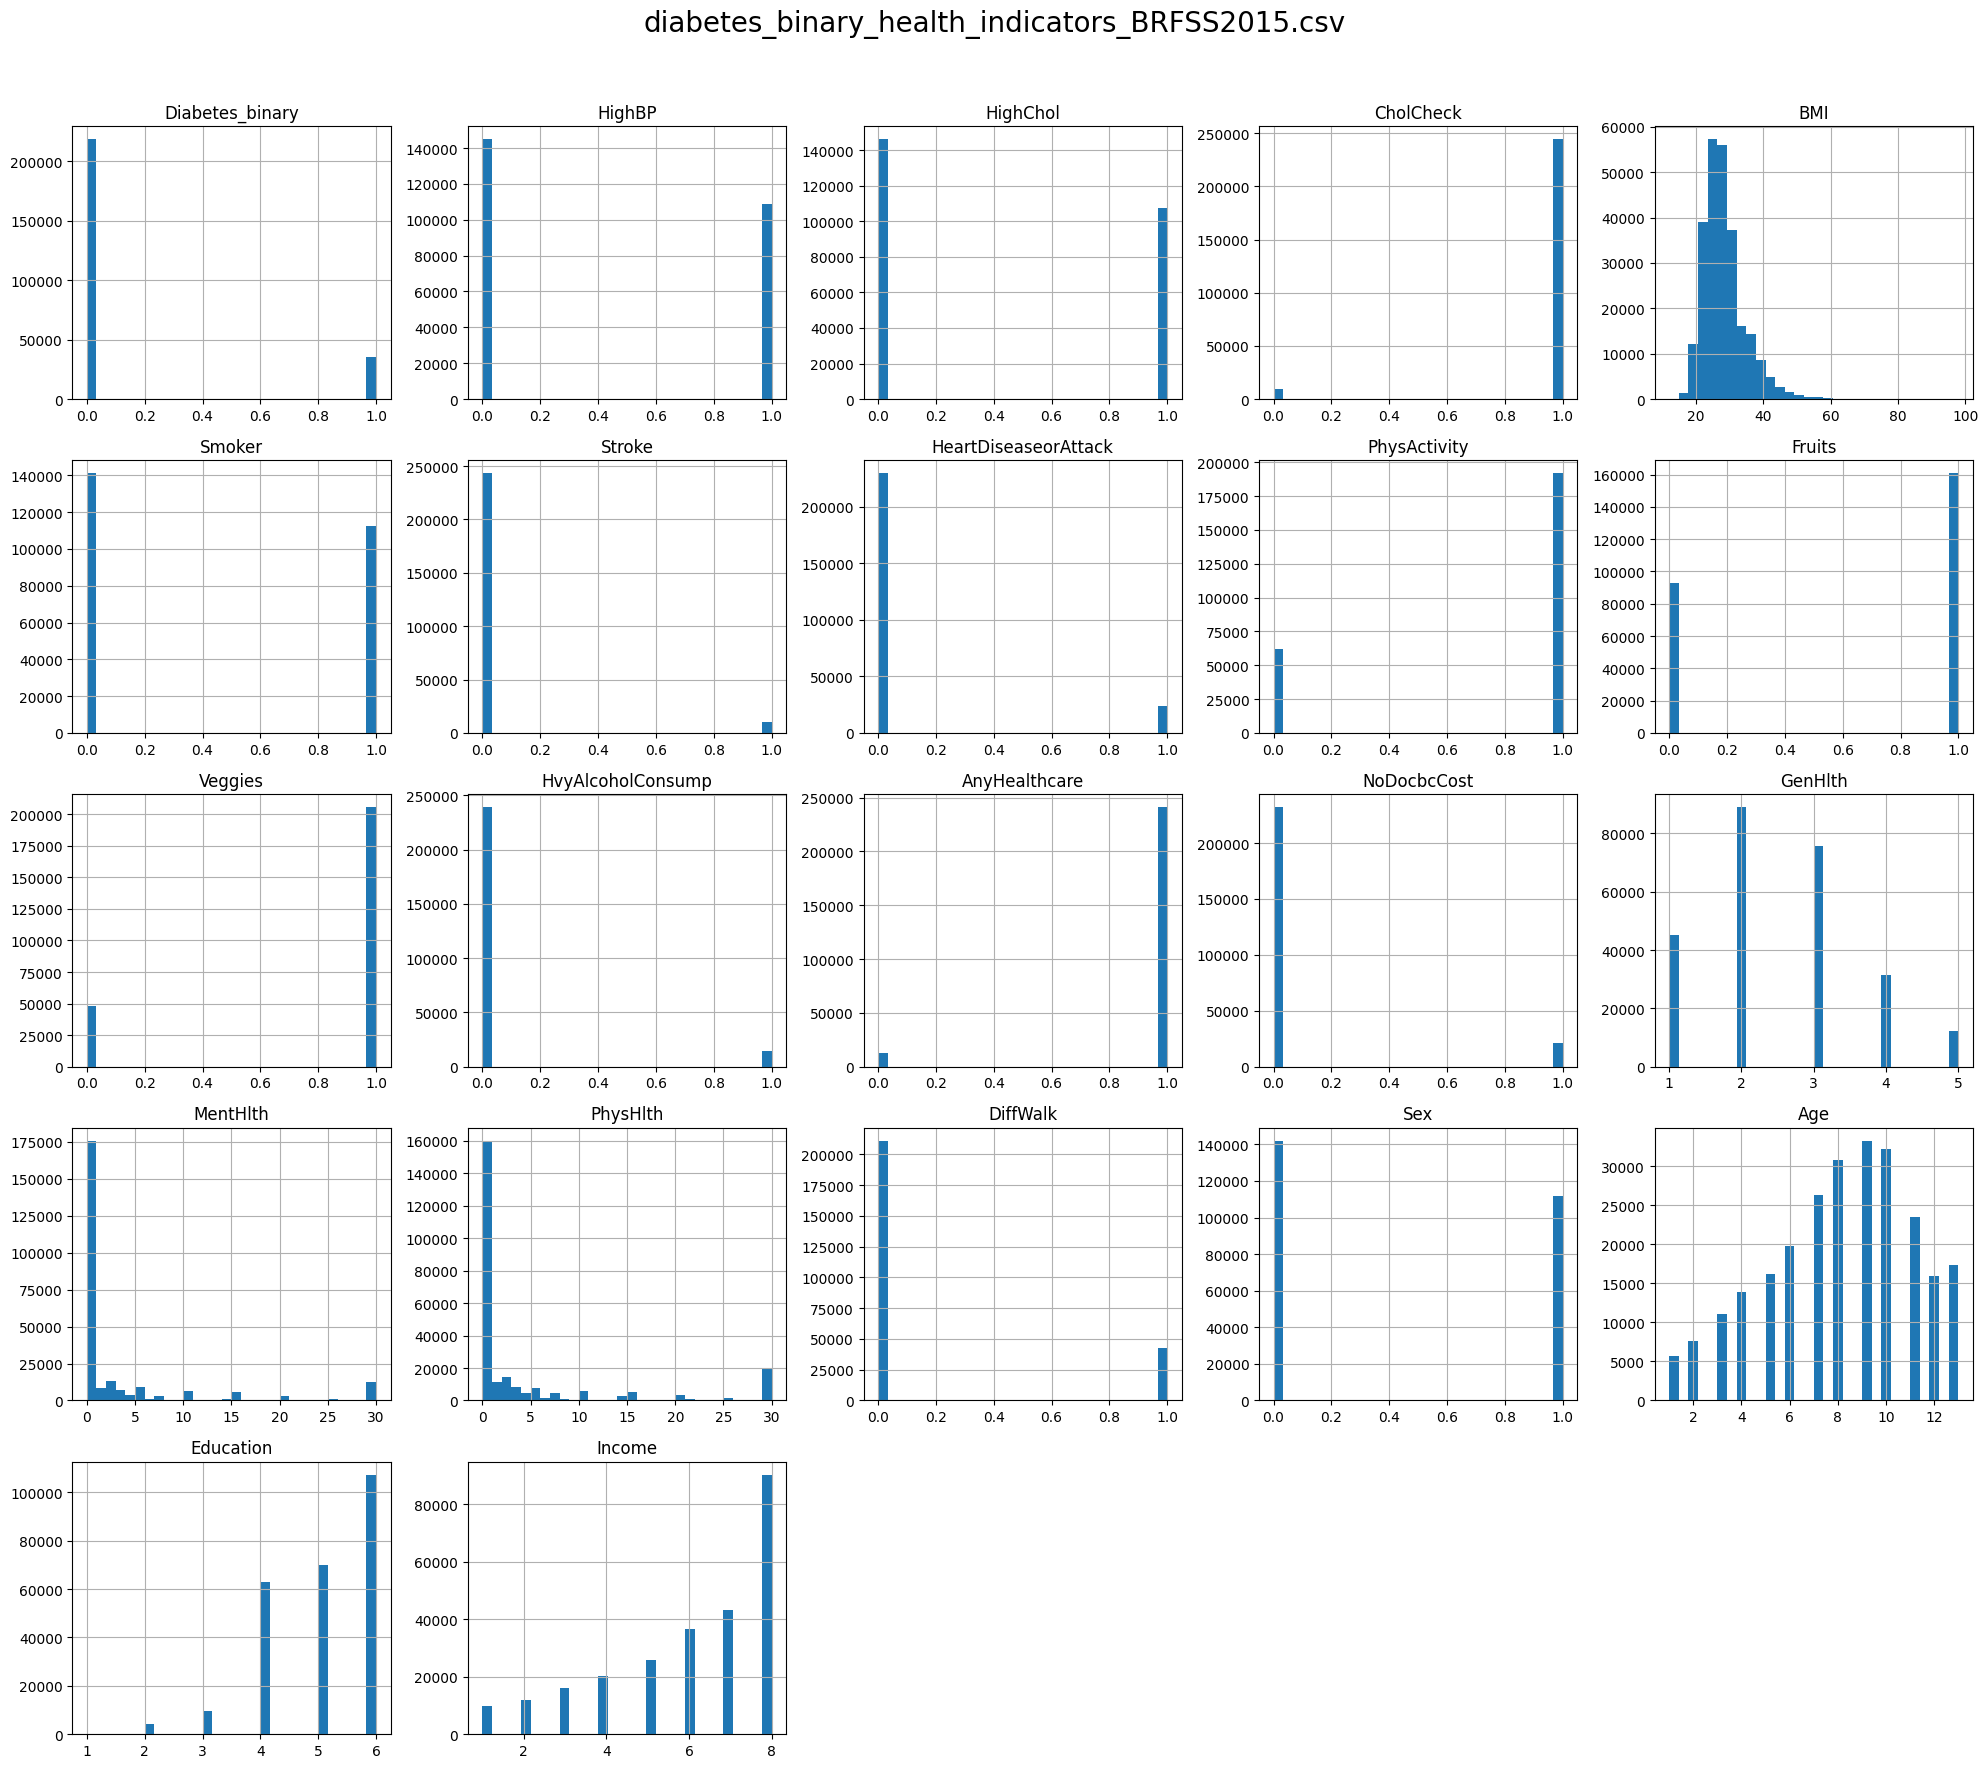

In [10]:
data[num_cols_d1].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

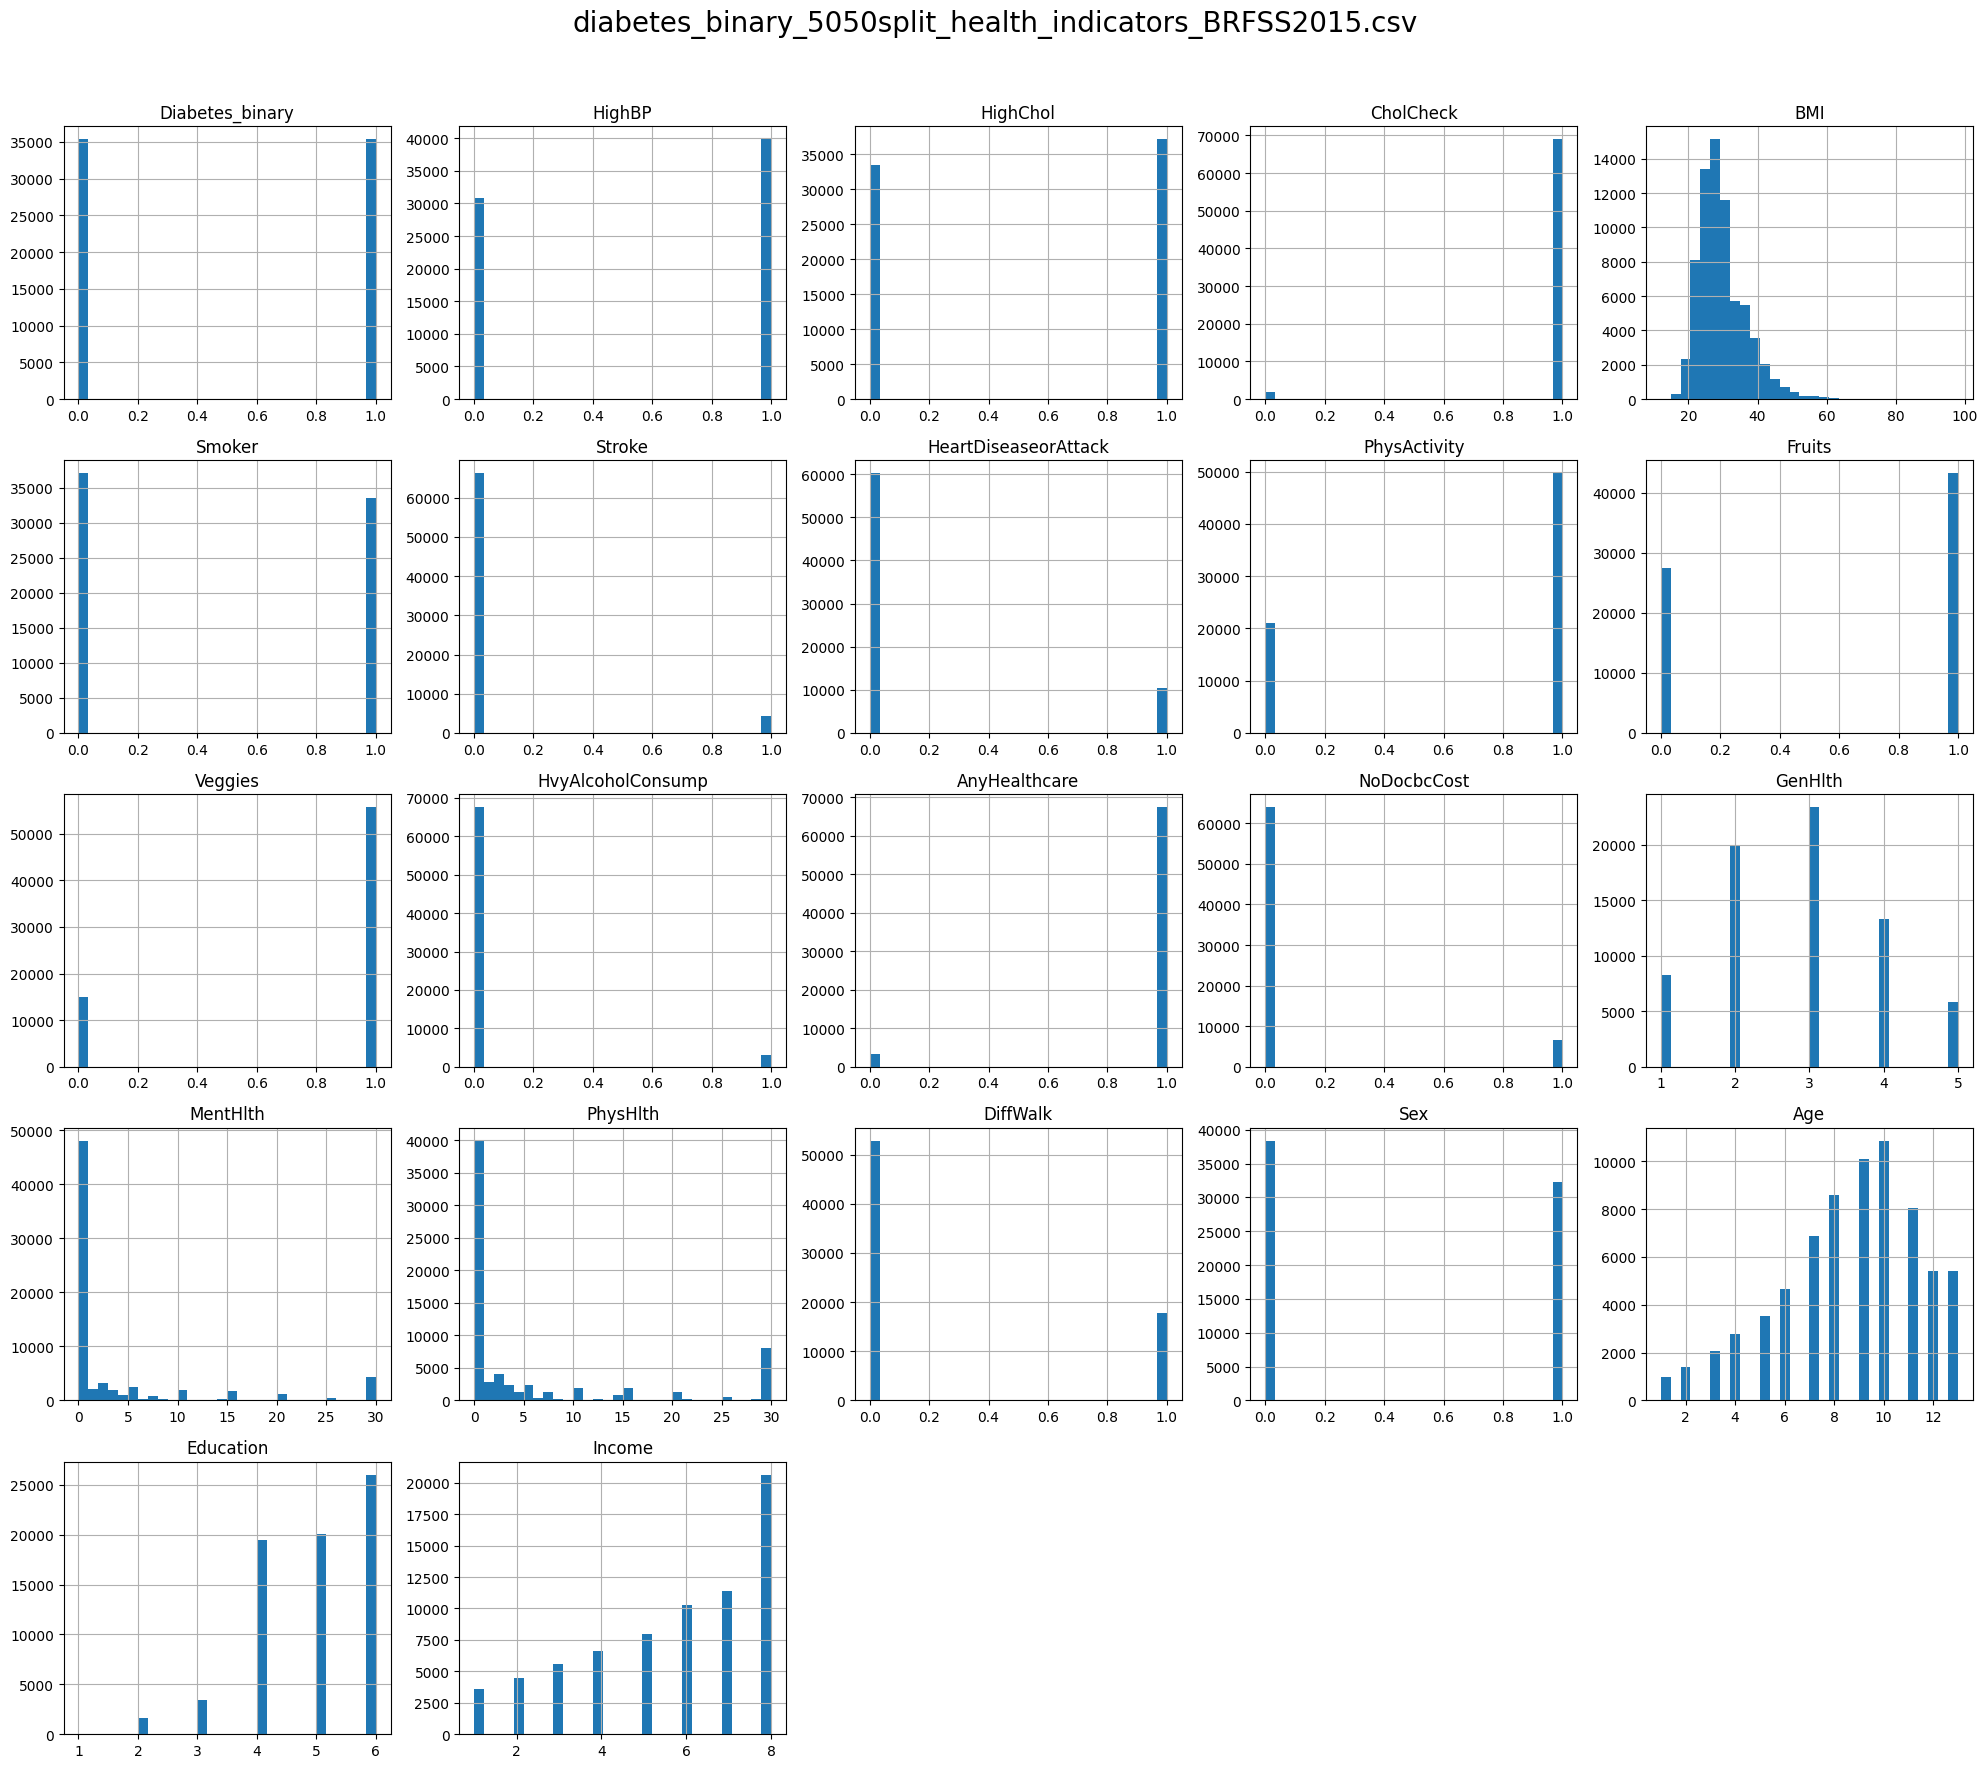

In [11]:
data_2[num_cols_d2].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_5050split_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_5050split_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

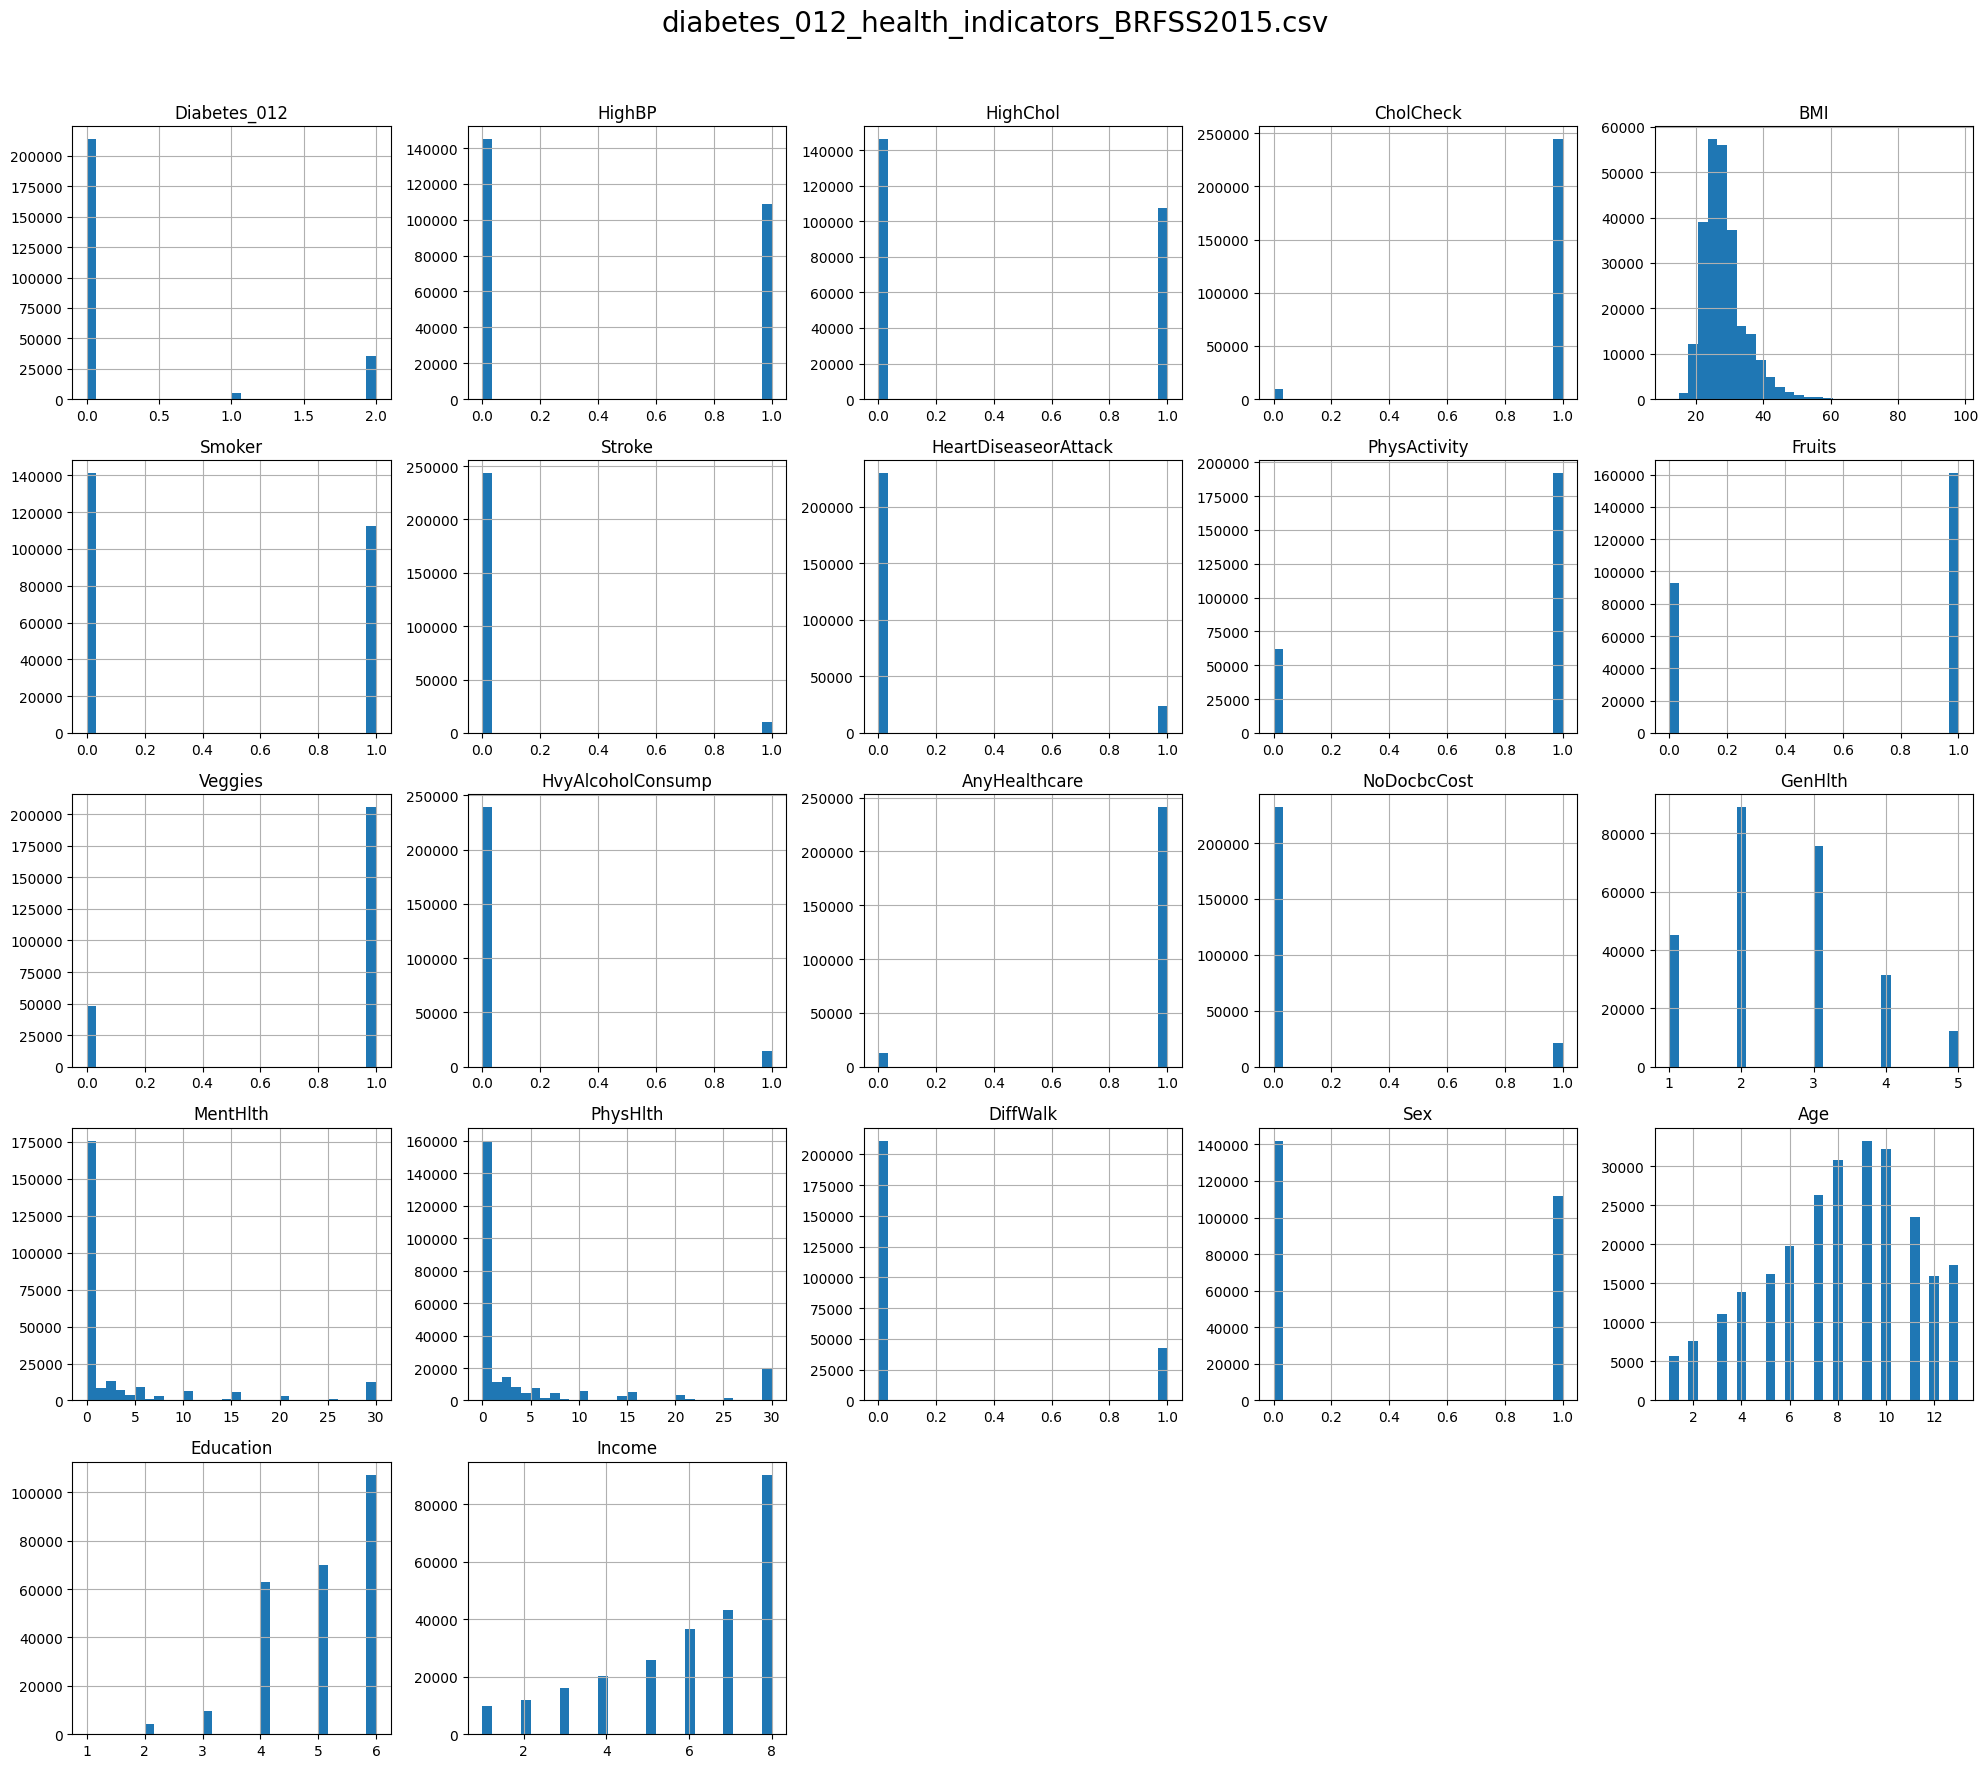

In [12]:
data_3[num_cols_d3].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_012_health_indicators_BRFSS2015.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_012_health_indicators_BRFSS2015_columns_graphs.jpg")

plt.show()

# Selected dataset

Back to [Index](#index)


We will use **diabetes_binary_health_indicators_BRFSS2015.csv**, why?
- 253,680 rows.
- Target Variable: Diabetes_binary (0 → No, 1 → Yes) — clean binary classification.
- Highly imbalanced (lots of 0s) — realistic, as diabetes is less common than non-diabetes.
- Great for building a model to detect diabetes risk using real-world skewed data.
- Real-world realism preserved.

Why not **diabetes_binary_5050split_health_indicators_BRFSS2015.csv** or **diabetes_012_health_indicators_BRFSS2015.csv** 

- **diabetes_binary_5050split_health_indicators_BRFSS2015.csv**
    - Only 70,692 rows
    - Downsampled non-diabetics — we lose real-world info.
    - Introduces bias if used alone.
    - Bad for EDA or realism.

- **diabetes_012_health_indicators_BRFSS2015.csv**
    - Target: Diabetes_012 (0 → no diabetes, 1 → prediabetes, 2 → diabetes)
    - Multiclass classification.
    - Severely imbalanced.
    - Needs heavy balancing.

## Data cleaning
Back to [Index](#index)

In [13]:
print(f" Total of {data.duplicated().sum()} duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. \n")

 Total of 24206 duplicated values in diabetes_binary_health_indicators_BRFSS2015.csv. 



In [14]:
duplicates = data[data.duplicated(keep=False)]
duplicates.sample(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
24140               0.0     0.0       1.0        1.0  20.0     1.0     0.0   
110977              0.0     0.0       1.0        1.0  31.0     0.0     0.0   
135398              0.0     0.0       1.0        1.0  25.0     1.0     0.0   
173775              0.0     0.0       0.0        1.0  29.0     0.0     0.0   
249126              0.0     1.0       1.0        1.0  27.0     1.0     0.0   
243542              0.0     0.0       0.0        1.0  31.0     0.0     0.0   
85074               0.0     0.0       0.0        1.0  27.0     1.0     0.0   
216975              0.0     0.0       0.0        1.0  23.0     0.0     0.0   
207552              0.0     1.0       1.0        1.0  30.0     0.0     0.0   
60952               0.0     0.0       0.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
24140                    0.0           1.0     1.0  ...            1.0   
110977                   0.0           1.0     1.0  ...            1.0   
135398                   1.0           1.0     1.0  ...            1.0   
173775                   0.0           1.0     1.0  ...            1.0   
249126                   0.0           1.0     0.0  ...            1.0   
243542                   0.0           1.0     1.0  ...            1.0   
85074                    0.0           1.0     1.0  ...            1.0   
216975                   0.0           1.0     1.0  ...            1.0   
207552                   0.0           1.0     0.0  ...            1.0   
60952                    0.0           0.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
24140           0.0      2.0       0.0       0.0       0.0  1.0  12.0   
110977          0.0      2.0       0.0       0.0       0.0  0.0   4.0   
135398          0.0      3.0       0.0       2.0       0.0  0.0  12.0   
173775          0.0      2.0       1.0       0.0       0.0  1.0   5.0   
249126          0.0      2.0       0.0       0.0       0.0  0.0   9.0   
243542          0.0      1.0       0.0       0.0       0.0  1.0   8.0   
85074           0.0      2.0       0.0       0.0       0.0  1.0   6.0   
216975          0.0      1.0       0.0       0.0       0.0  1.0   6.0   
207552          0.0      3.0       0.0       0.0       0.0  1.0   5.0   
60952           0.0      2.0       0.0       0.0       0.0  0.0   3.0   

        Education  Income  
24140         6.0     8.0  
110977        6.0     8.0  
135398        4.0     6.0  
173775        6.0     8.0  
249126        4.0     6.0  
243542        6.0     8.0  
85074         6.0     8.0  
216975        5.0     8.0  
207552        6.0     8.0  
60952         6.0     8.0  

[10 rows x 22 columns]

In [15]:
duplicate_count = data.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicate_count}")

data_cleaned = data.drop_duplicates()

print(f"Shape before: {data.shape}, after deduplication: {data_cleaned.shape}")

Number of exact duplicate rows: 24206
Shape before: (253680, 22), after deduplication: (229474, 22)


In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentH

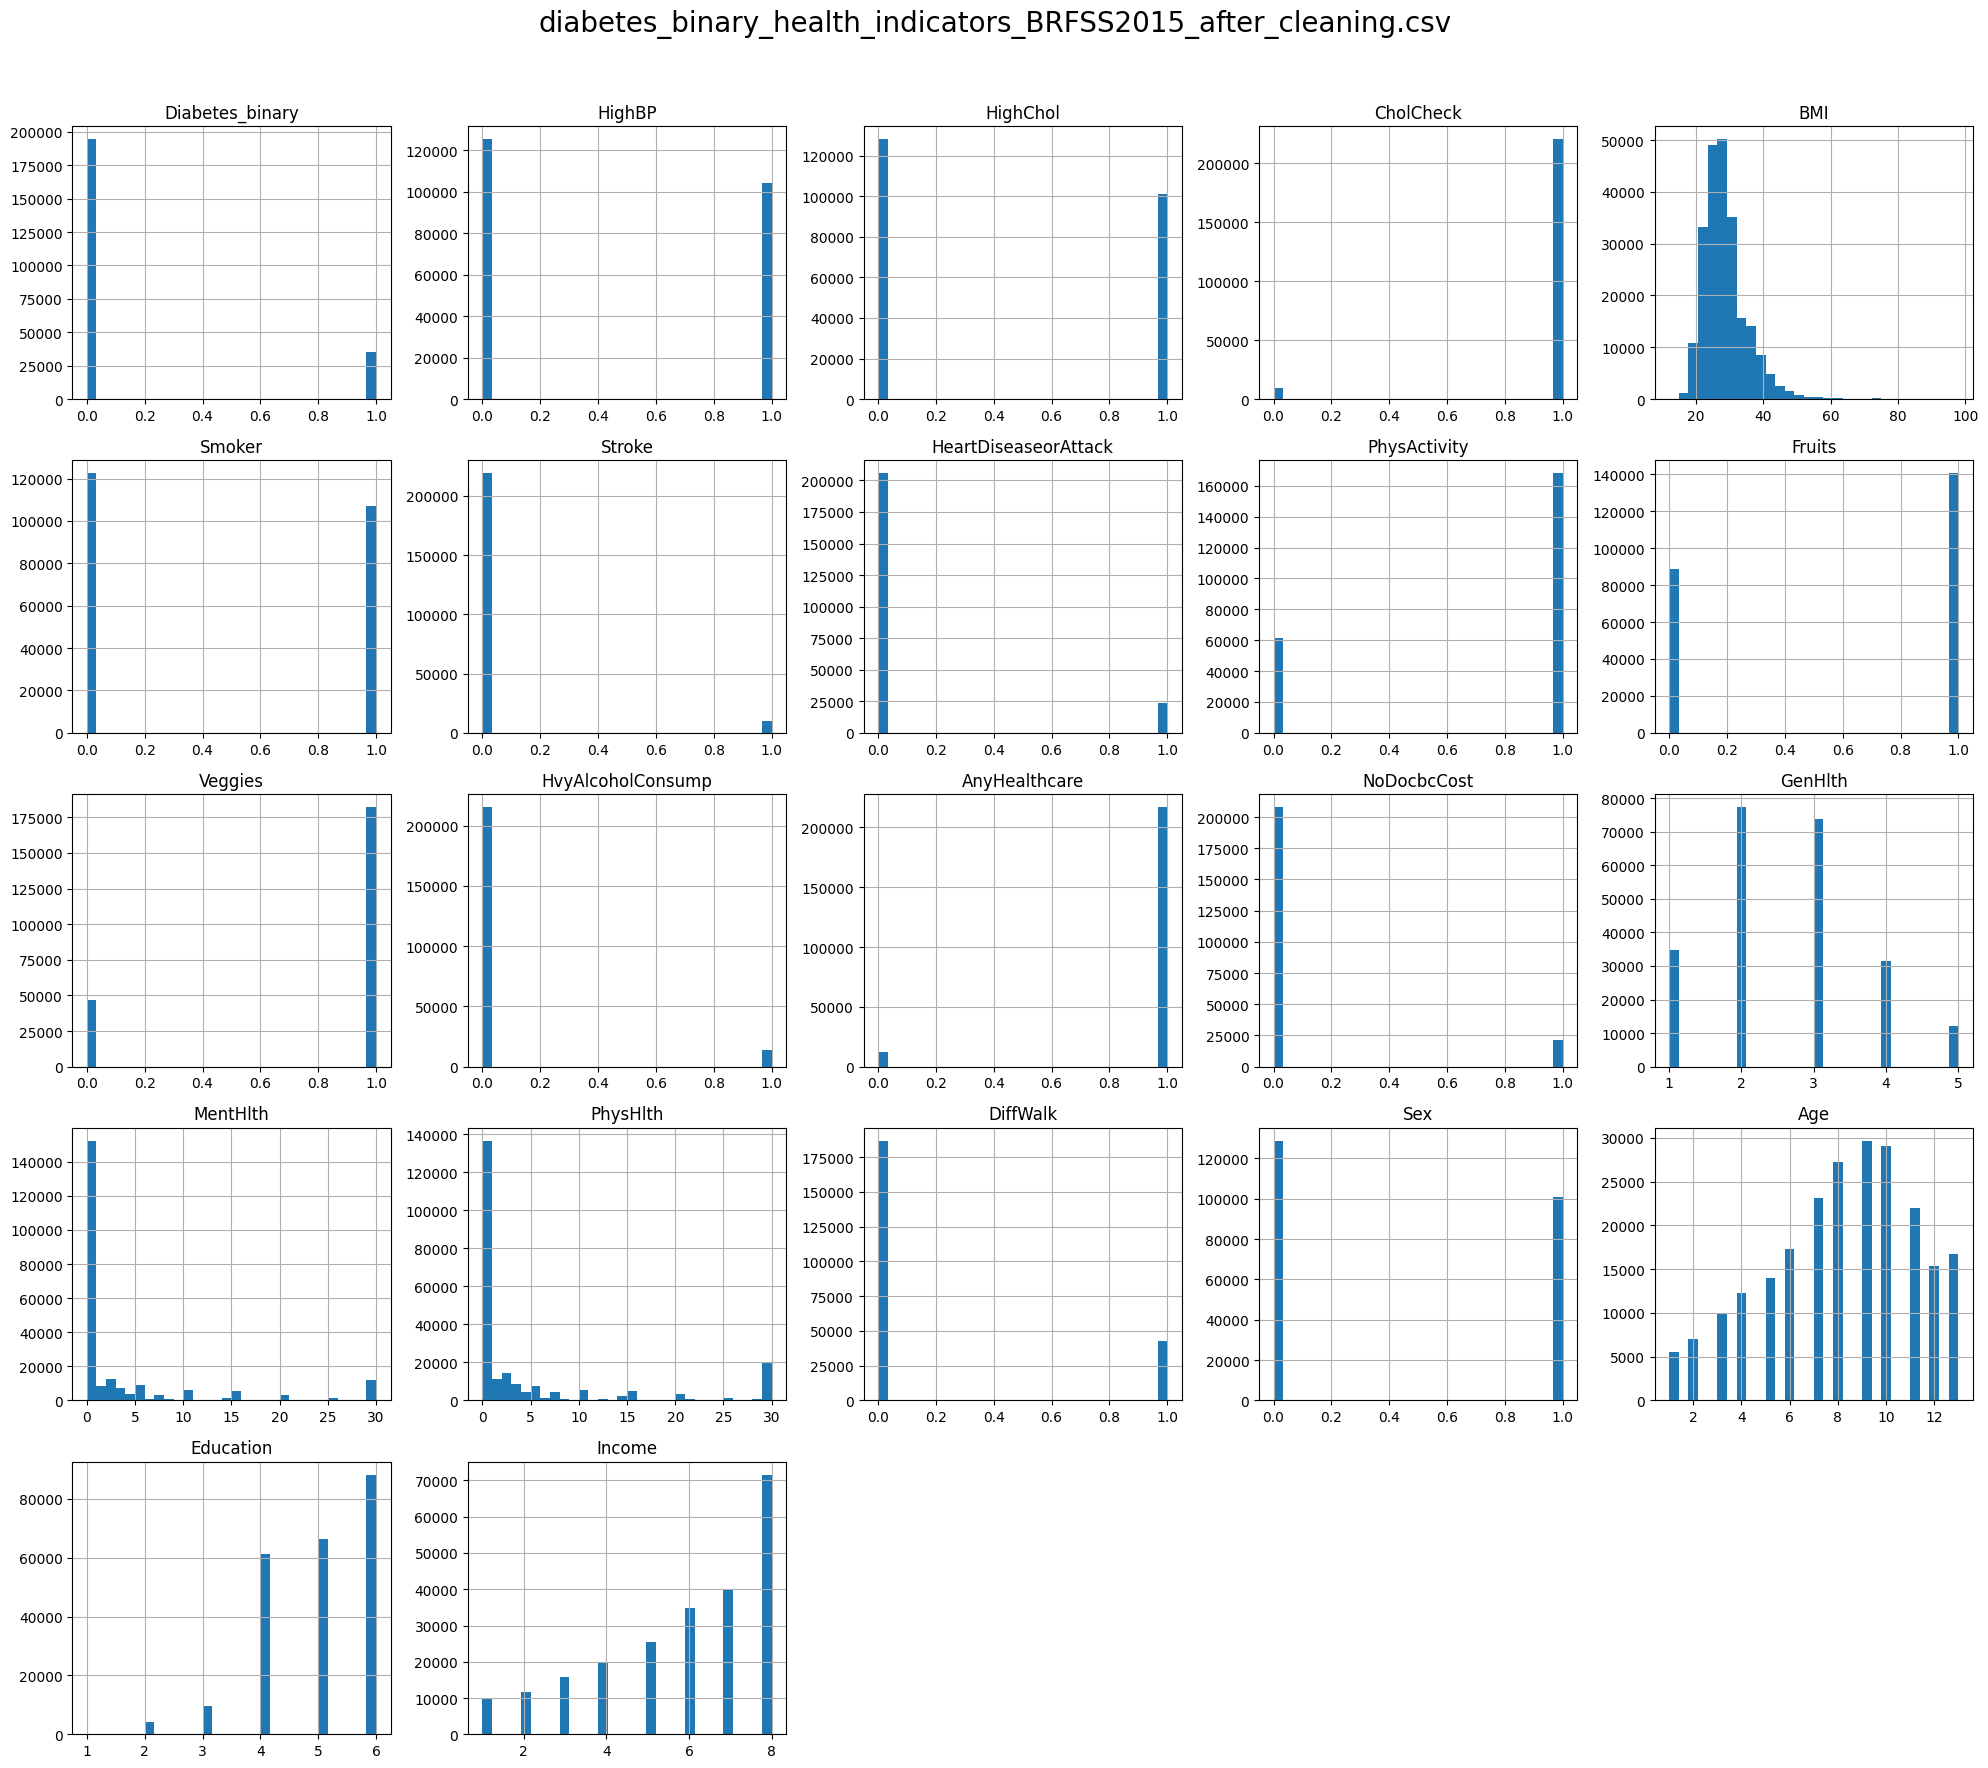

In [17]:
num_cols_d1_a_c = data_cleaned.select_dtypes(include=["number"]).columns
cat_cols_d1_a_c = data_cleaned.select_dtypes(exclude=["number"]).columns

data_cleaned[num_cols_d1_a_c].hist(figsize=(20, 18), bins=30)

plt.suptitle("diabetes_binary_health_indicators_BRFSS2015_after_cleaning.csv", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/diabetes_binary_health_indicators_BRFSS2015_after_cleaning_columns_graphs.jpg")

plt.show()

In [18]:
data_cleaned.isna().sum()[data_cleaned.isna().sum()>0]

Series([], dtype: int64)

## DEEP DIVE
Back to [Index](#index)

1. [Class distribution](#class-distribution)
2. [Categorical variables](#categorical-variables)
    - [Categorical var analysis](#categorical-var-analysis)
3. [Continuous variables](#continuous-variables)
    - [Continuous var analysis](#continuous-var-analysis)

### Class distribution
Back to [Deep Dive](#deep-dive)

Back to [Index](#index)

/tmp/ipykernel_572/1084929406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


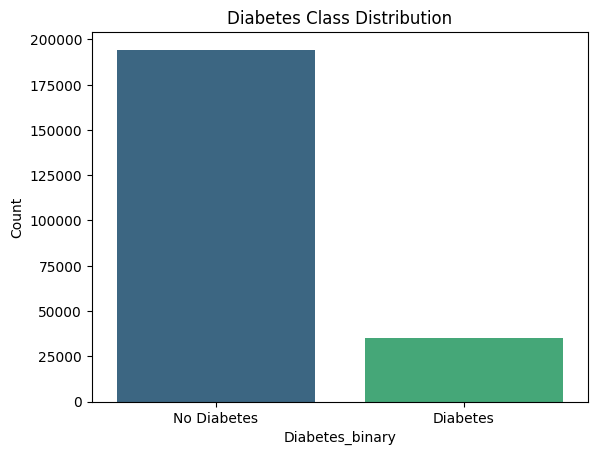

Class Breakdown:
  No Diabetes: 194,377 samples (84.71%)
  Diabetes: 35,097 samples (15.29%)


In [19]:
# Distribution count
class_counts = data_cleaned['Diabetes_binary'].value_counts()
class_percentages = data_cleaned['Diabetes_binary'].value_counts(normalize=True) * 100

# Plot
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.title("Diabetes Class Distribution")
plt.show()

# Print stats
print("Class Breakdown:")
for label, count in class_counts.items():
    percentage = class_percentages[label]
    label_text = "Diabetes" if label == 1 else "No Diabetes"
    print(f"  {label_text}: {count:,} samples ({percentage:.2f}%)")

### Categorical variables
Back to [Deep Dive](#deep-dive)

Back to [Index](#index)

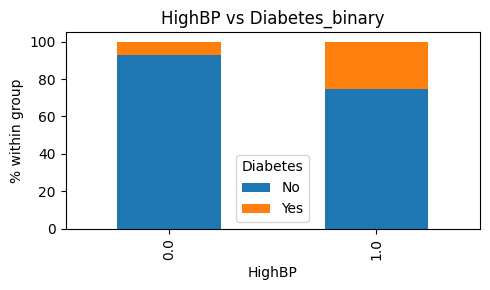

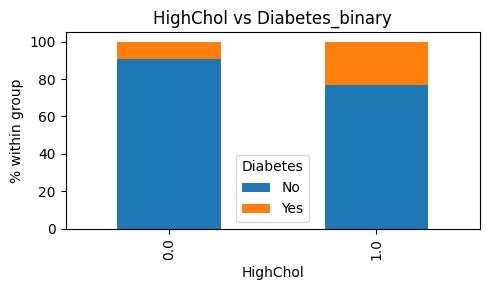

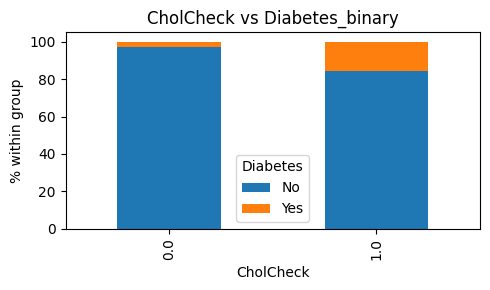

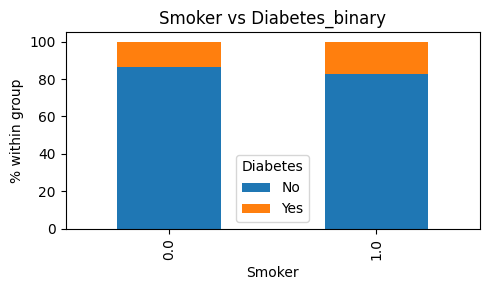

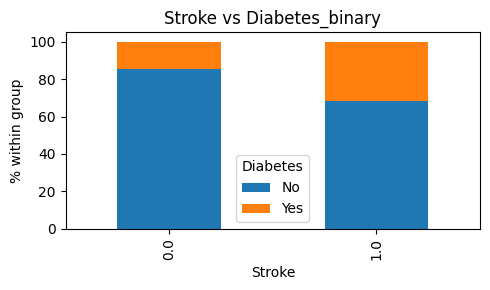

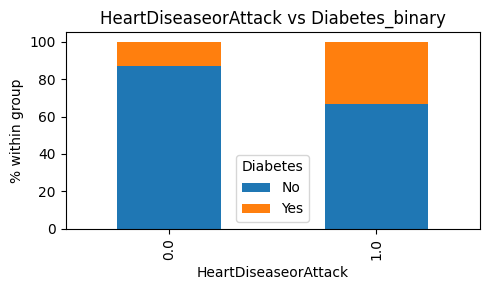

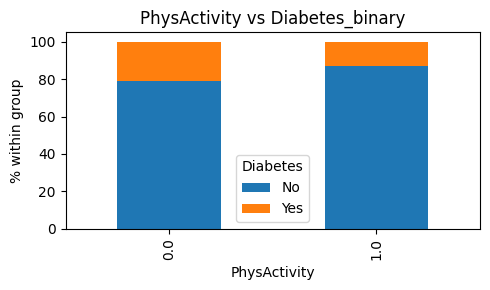

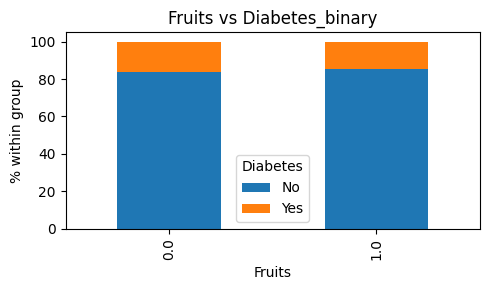

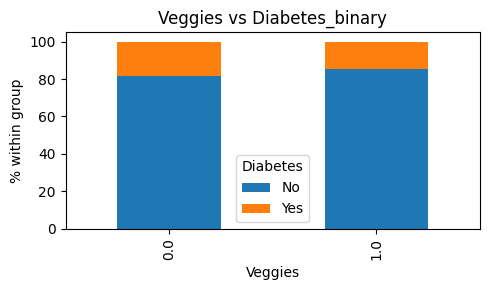

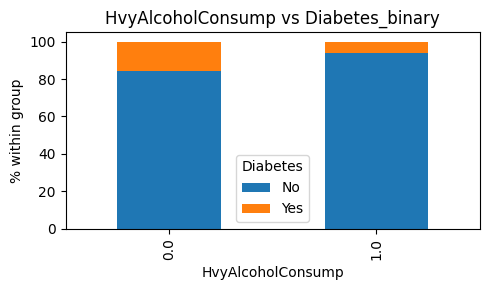

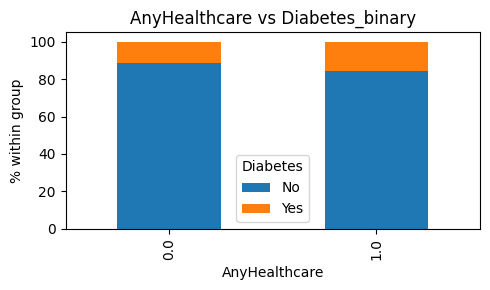

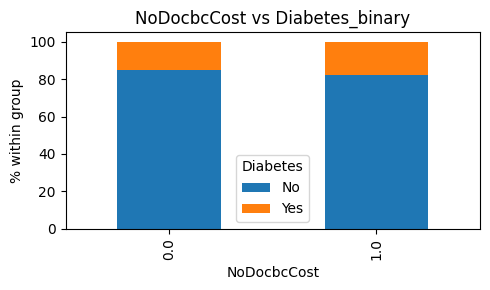

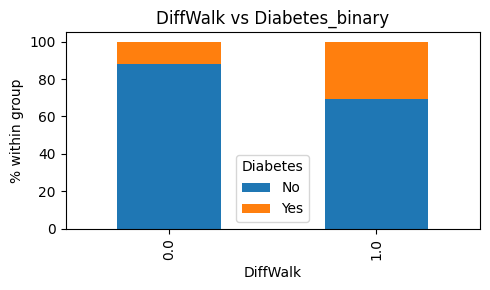

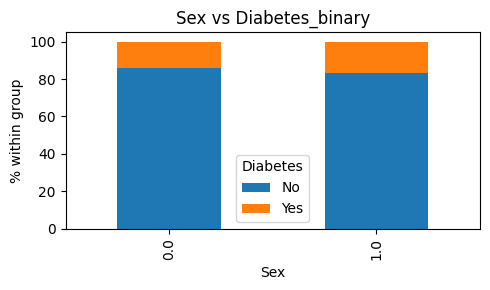

In [20]:
binary_vars = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
    "DiffWalk", "Sex"
]

for var in binary_vars:
    cross = pd.crosstab(data_cleaned[var], data_cleaned["Diabetes_binary"], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, figsize=(5, 3))
    plt.title(f"{var} vs Diabetes_binary")
    plt.ylabel("% within group")
    plt.xlabel(var)
    plt.legend(title="Diabetes", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()

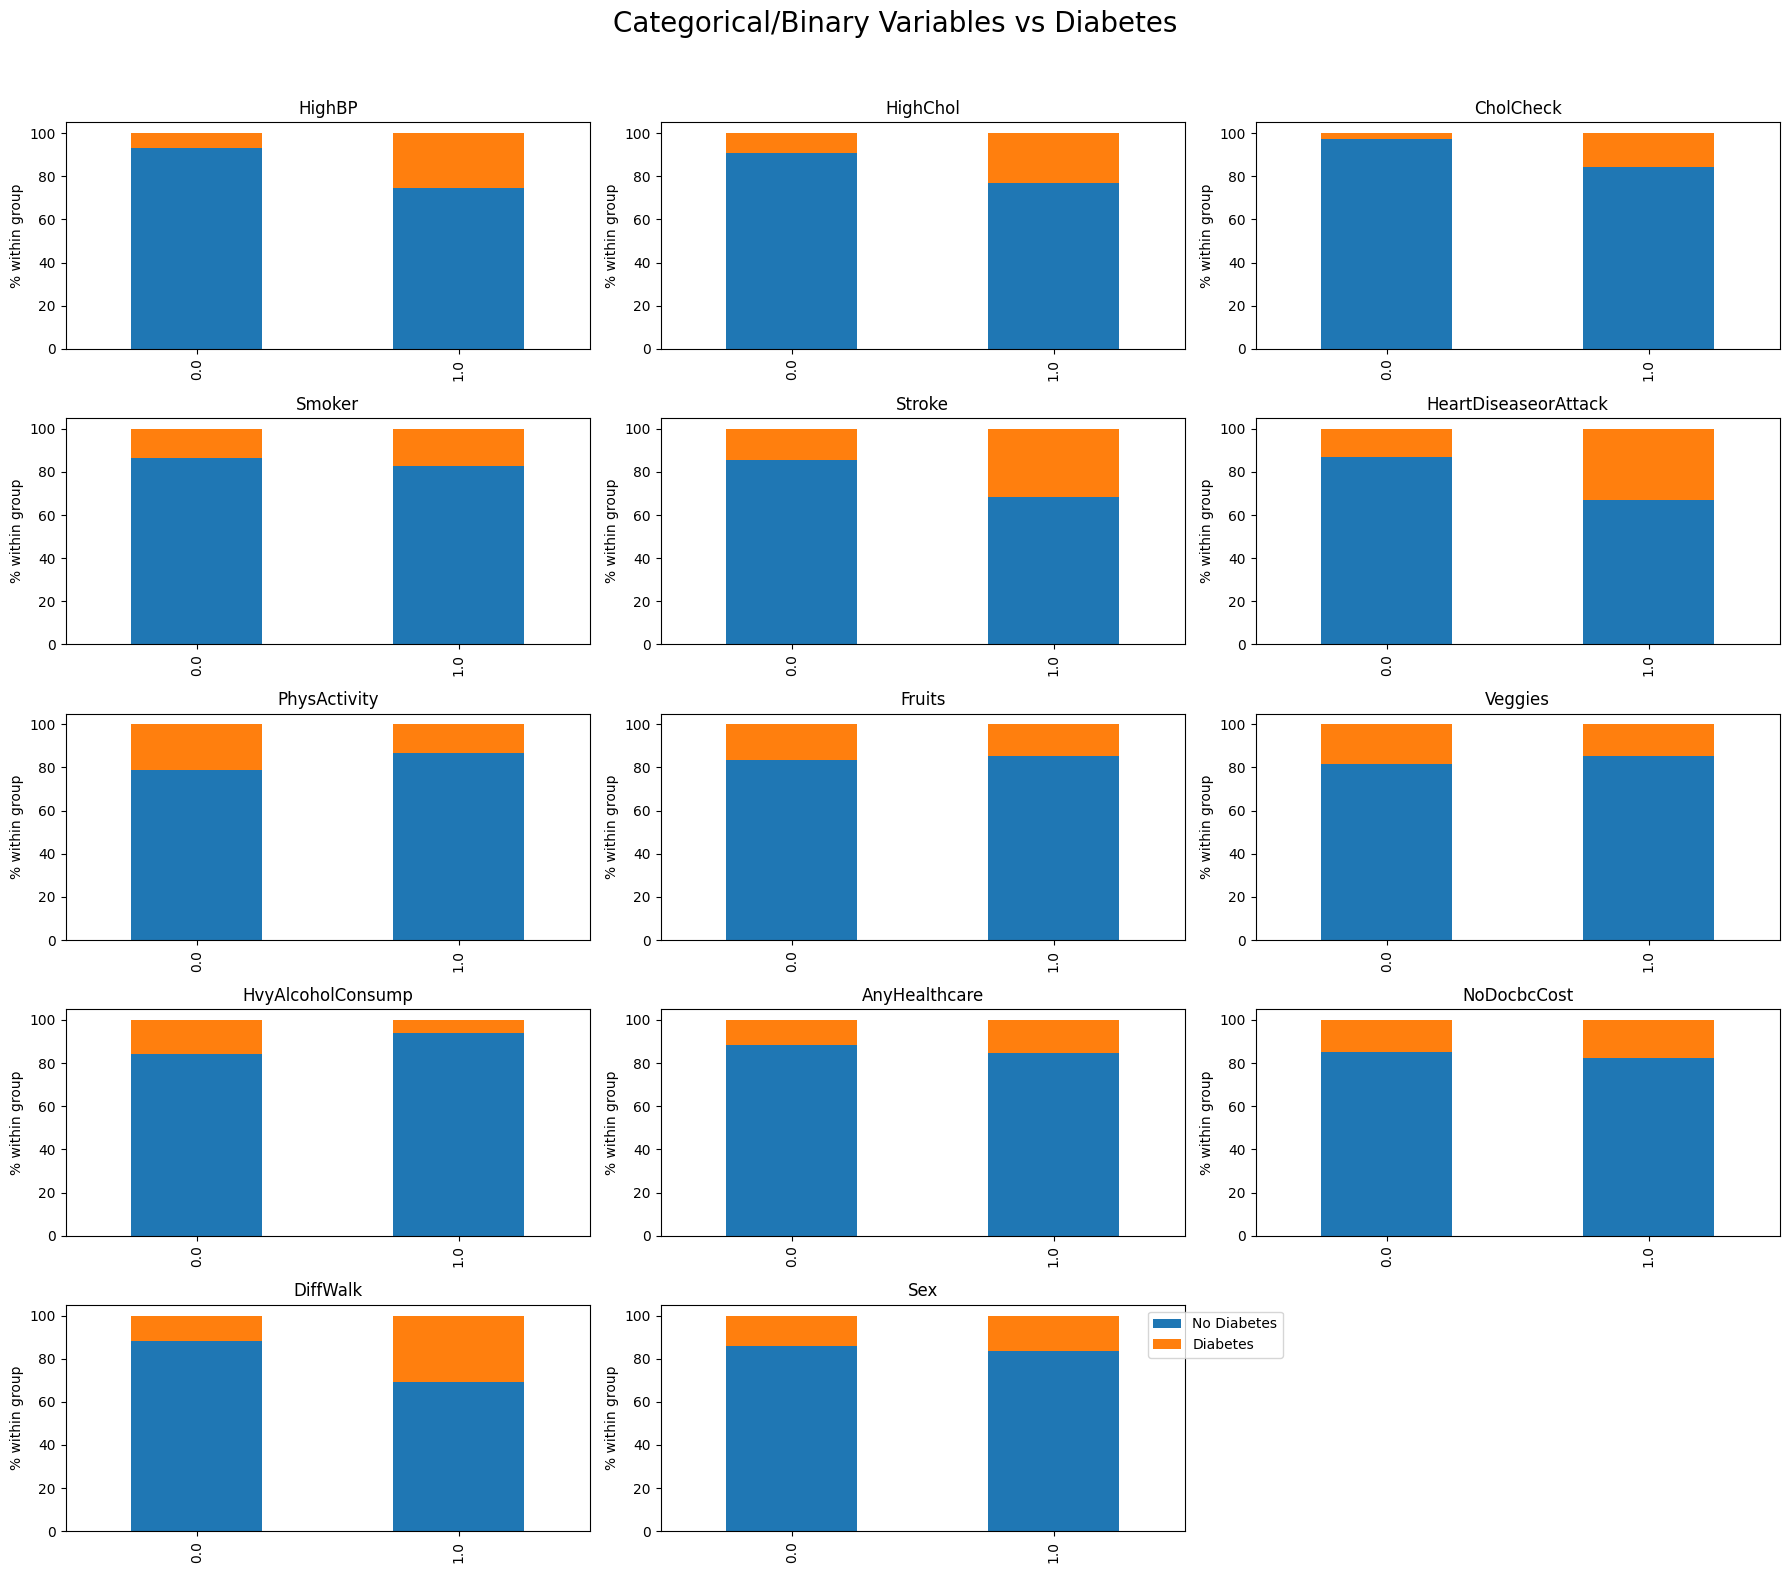

In [21]:
import matplotlib.gridspec as gridspec

binary_vars = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
    "DiffWalk", "Sex"
]

fig = plt.figure(figsize=(18, 16))
gs = gridspec.GridSpec(5, 3)

for i, var in enumerate(binary_vars):
    ax = fig.add_subplot(gs[i])
    cross = pd.crosstab(data_cleaned[var], data_cleaned["Diabetes_binary"], normalize='index') * 100
    cross.plot(kind='bar', stacked=True, ax=ax, legend=False)
    ax.set_title(f"{var}")
    ax.set_ylabel("% within group")
    ax.set_xlabel("")

fig.suptitle("Categorical/Binary Variables vs Diabetes", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(["No Diabetes", "Diabetes"], loc='upper right', bbox_to_anchor=(1.2, 1))

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/categorical_binary_var_vs_diabetes_graphs.jpg")

plt.show()

### Categorical var analysis
Back to [Deep Dive](#deep-dive)

Back to [Index](#index)

- **HighBP** (High Blood Pressure)
    - Individuals with High Blood Pressure (HighBP = 1) have a much higher rate of diabetes compared to those without. 
    - This confirms that blood pressure is a major risk factor.

- **HighChol** (High Cholesterol)
    - Those who report High Cholesterol (HighChol = 1) are also more likely to be diabetic, showing the connection between cardiovascular and metabolic health.

- **CholCheck** (Had cholesterol check in last 5 years)
    - Having had a Cholesterol Check in the past 5 years does not clearly distinguish diabetics from non-diabetics. 
    - This may suggest that screening is common or done in response to health issues rather than prevention.

- **Stroke** & **HeartDiseaseorAttack**
    - Both Stroke and Heart Disease or Attack show a sharp increase in diabetes prevalence. 
    - These conditions may reflect long-term damage caused by diabetes, or serve as comorbidity signals.

- **PhysActivity**, **Fruits**, **Veggies**
    - Healthier behaviors like Physical Activity, and consuming Fruits and Vegetables are more common among non-diabetics. 
    - Their absence correlates with greater risk.

- **DiffWalk** (Difficulty walking)
    - The feature Difficulty Walking (DiffWalk = 1) is one of the strongest indicators — likely related to obesity, nerve damage, or poor circulation, all common diabetes complications.

- **NoDocbcCost**
    - People who could not afford to see a doctor (NoDocbcCost = 1) showed slightly elevated diabetes rates, underlining the role of healthcare accessibility.


Features like **HighBP**, **HighChol**, **HeartDiseaseorAttack**, and **DiffWalk** exhibit strong divergence.

### Continuous variables
Back to [Deep Dive](#deep-dive)

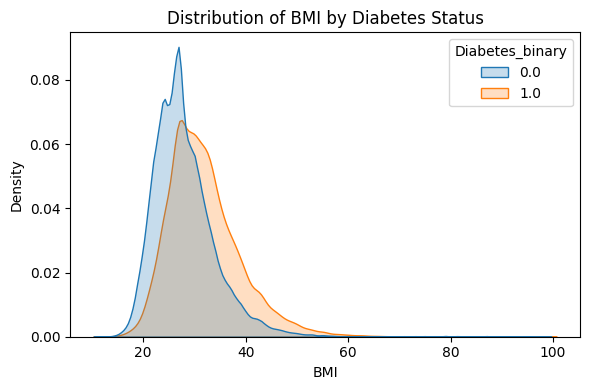

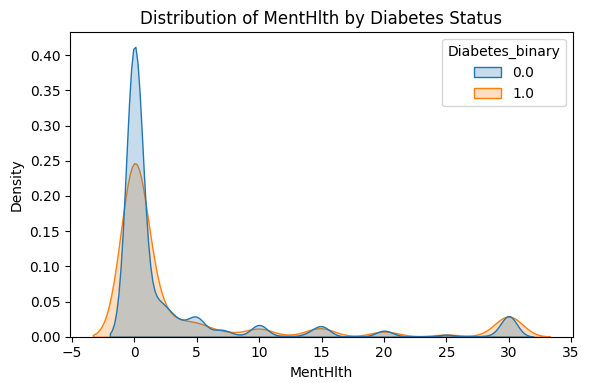

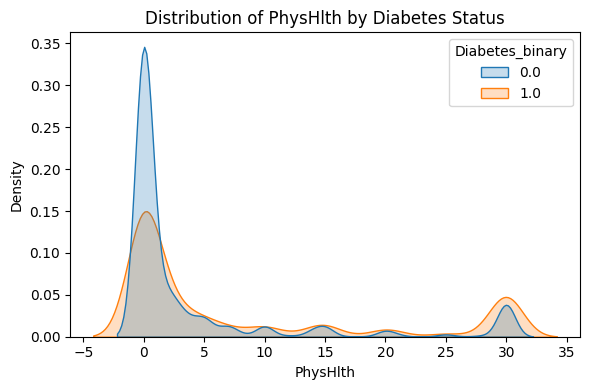

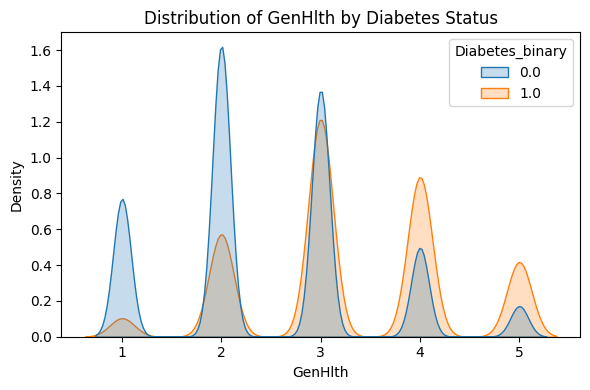

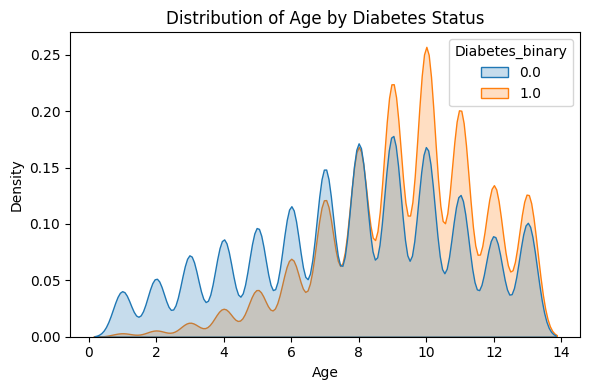

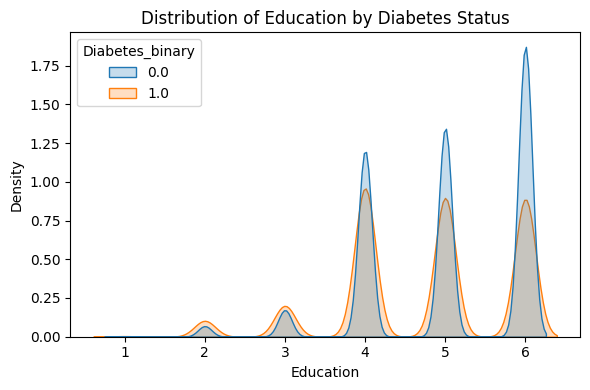

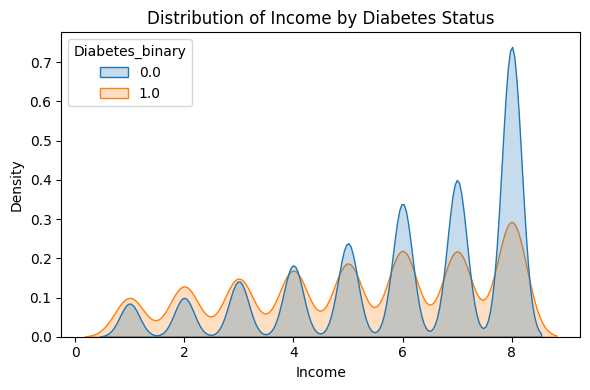

In [22]:
continuous_vars = ["BMI", "MentHlth", "PhysHlth", "GenHlth", "Age", "Education", "Income"]

for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=data_cleaned, x=var, hue="Diabetes_binary", fill=True, common_norm=False)
    plt.title(f"Distribution of {var} by Diabetes Status")
    plt.xlabel(var)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

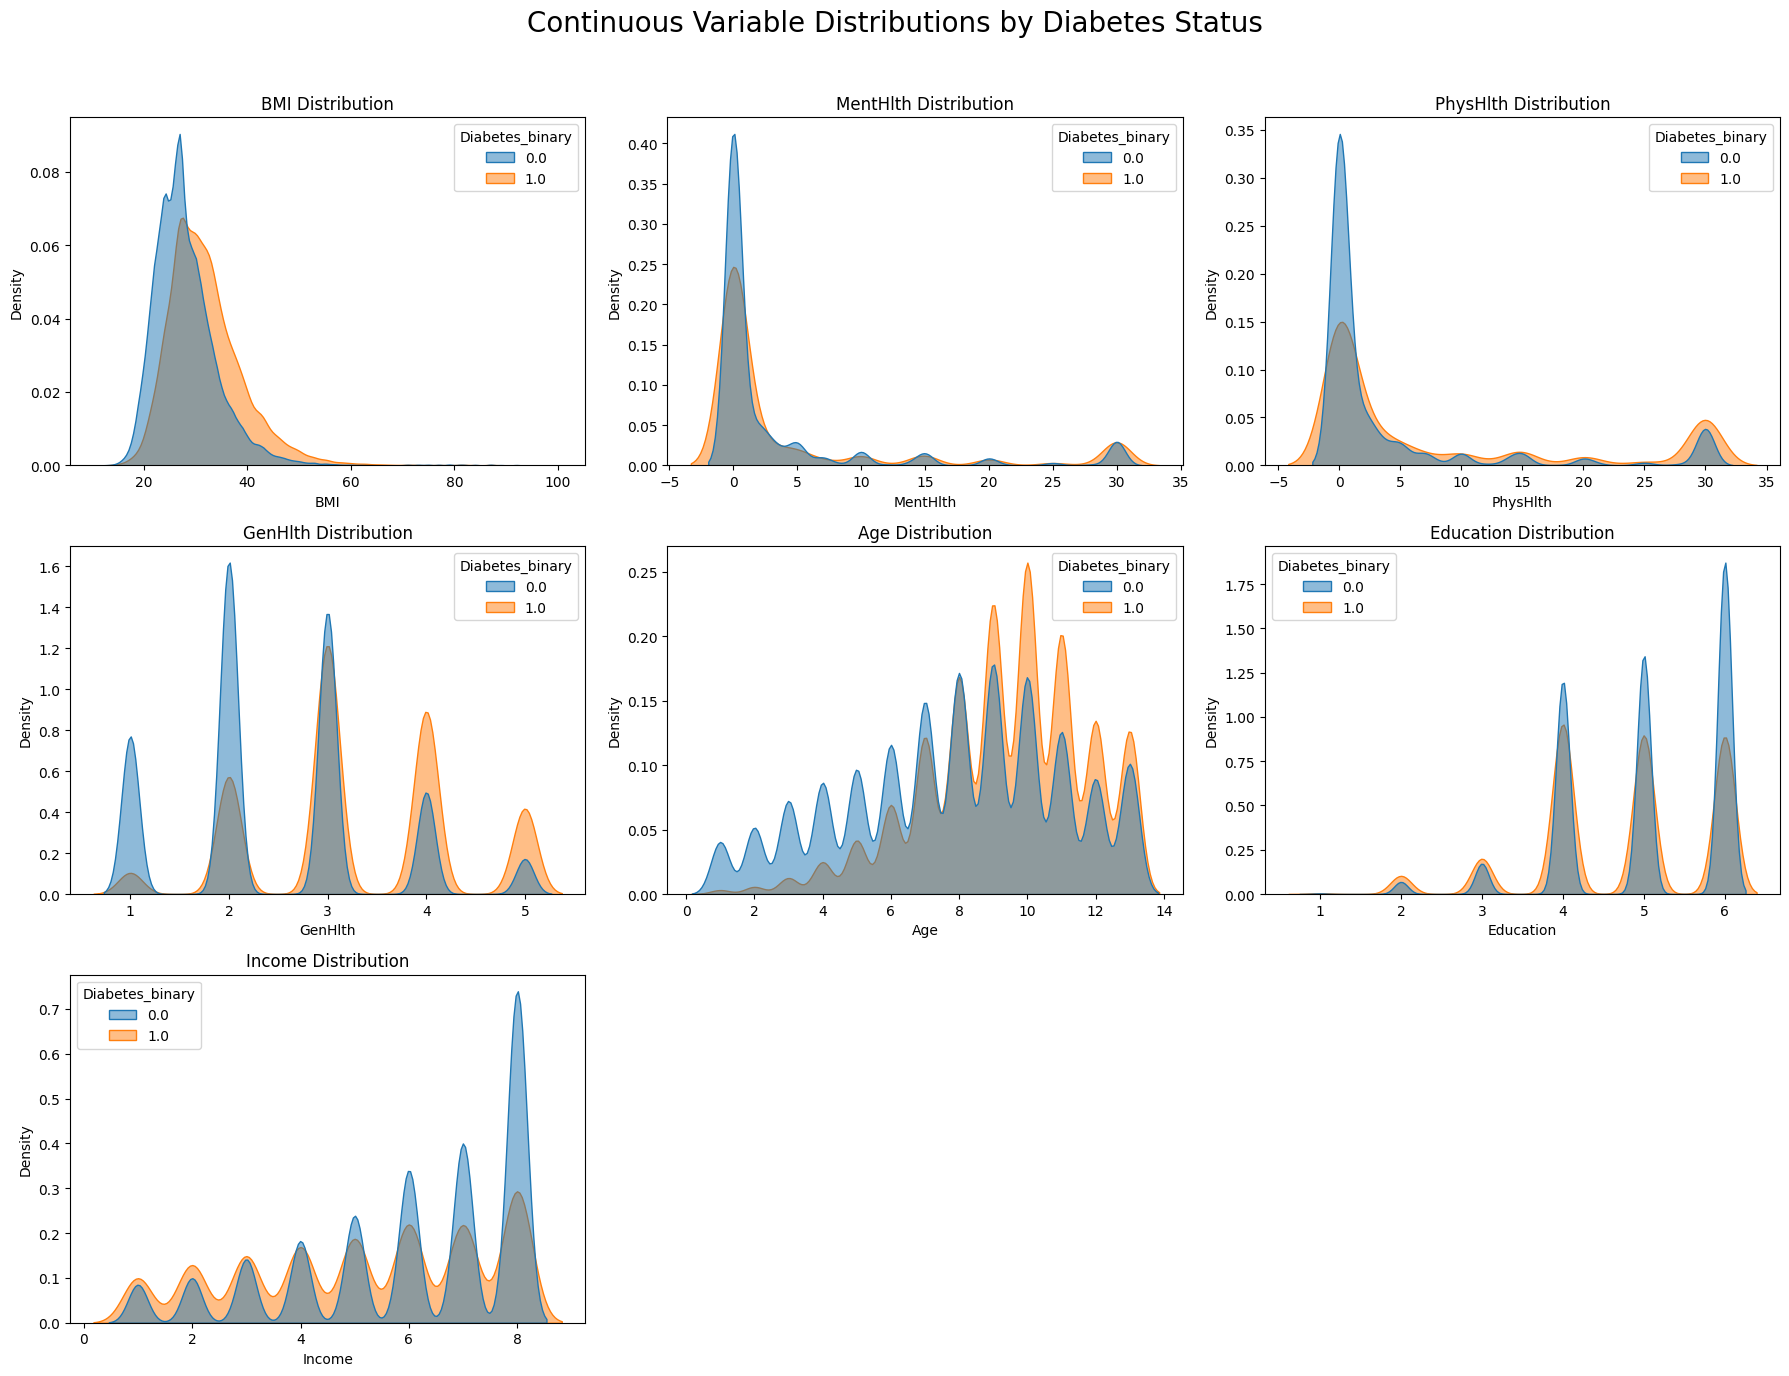

In [23]:
continuous_vars = ["BMI", "MentHlth", "PhysHlth", "GenHlth", "Age", "Education", "Income"]

fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(3, 3)

for i, var in enumerate(continuous_vars):
    ax = fig.add_subplot(gs[i])
    sns.kdeplot(data=data_cleaned, x=var, hue="Diabetes_binary", fill=True, common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f"{var} Distribution")
    ax.set_ylabel("Density")
    ax.set_xlabel(var)

fig.suptitle("Continuous Variable Distributions by Diabetes Status", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/continuous_var_distributions_by_diabetes_graphs.jpg")

plt.show()

### Continuous var analysis
Back to [Deep Dive](#deep-dive)

Back to [Index](#index)

- **BMI**
    - Body Mass Index (BMI) is clearly higher among diabetics. 
    - The distribution is broader and peaks at higher values compared to non-diabetics. 
    - BMI is a top-tier predictor of diabetes risk.

-  **MentHlth** & **PhysHlth**
    - Physical and Mental Health Days (PhysHlth, MentHlth) show right-skewed distributions for diabetics — meaning they experience more days of poor physical and mental health. 
    - These reflect the broader health impact of diabetes.

-  **GenHlth** (1=Excellent → 5=Poor)
    - General Health (GenHlth), scored from 1 (excellent) to 5 (poor), shows a clear trend: diabetics tend to report worse general health — clustering around values 4 and 5.

- **Age**
    - Age also shifts right for diabetics, with higher risk observed in older groups. 
    - This aligns with real-world prevalence trends.

- **Education** & **Income**
    - Education and Income both show modest effects. 
    - Individuals with higher education and income tend to have lower diabetes rates. 
    - These socioeconomic variables highlight the influence of health literacy, access to care, and nutrition.

**BMI**, **GenHlth**, **Age**, and Health Days (Phys/Ment) show strong predictive potential. **BMI** is likely the best variable.

## Deep Dive part II
Back to [Index](#index)

1. [Correlation map](#correlation-map)
2. [Correlation insights](#correlation-insights)
3. [Variance Inflation Factor VIF](#variance-inflation-factor-vif)
    - [Multicollinearity VIF Results](#multicollinearity-vif-results)
4. [Statistical Feature Selection](#statistical-feature-selection)
    - [Chi-squared test](#chi-squared-test)
    - [ANOVA F-test](#anova-f-test)
    - [Tests results](#tests-results)
    - [Feature Importance Ranking Summary](#feature-importance-ranking-summary)
5. [Outliers exploration](#outliers-exploration)
    - [Outliers interpretation](#outliers-interpretation)
    - [Handling outliers](#handling-outliers)

### Correlation map
Back to [Deep Dive part II](#deep-dive-part-ii)

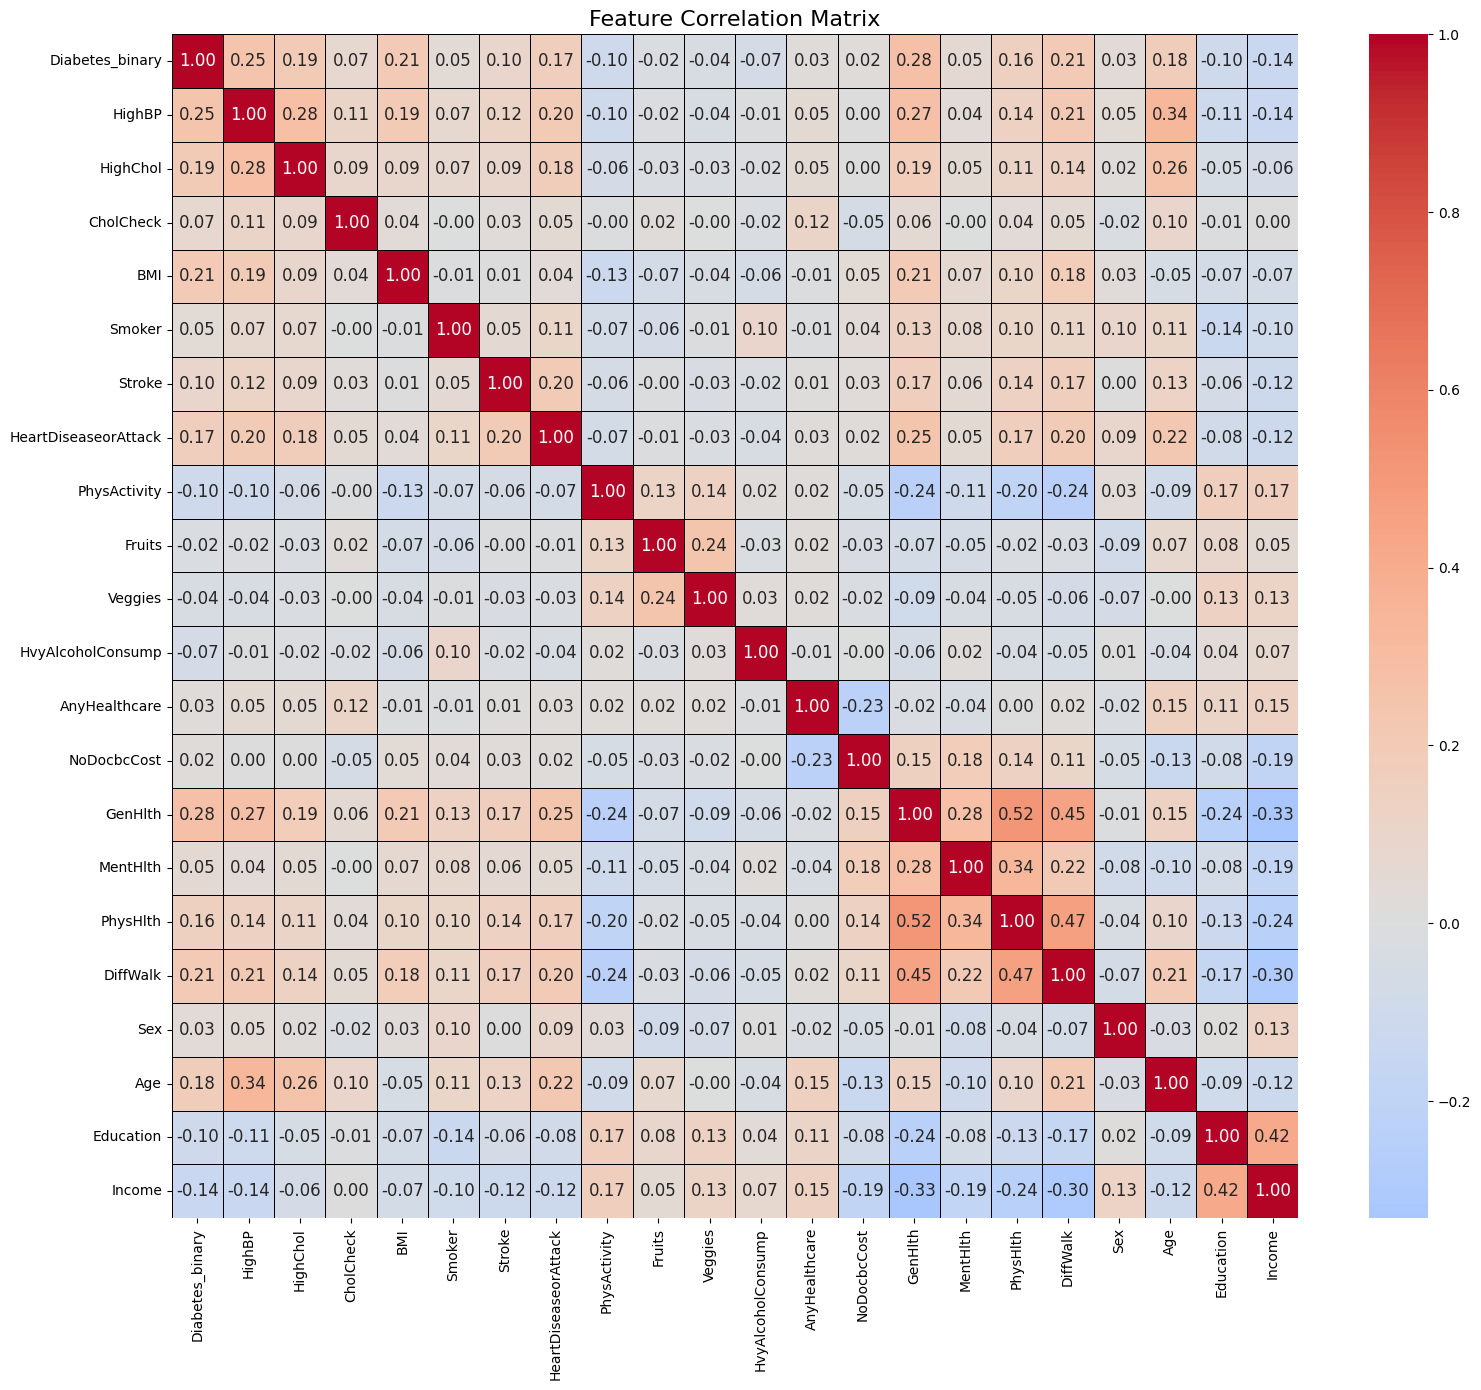

Top correlations with Diabetes_binary:

GenHlth                 0.276940
HighBP                  0.254318
DiffWalk                0.205302
BMI                     0.205086
HighChol                0.194944
Age                     0.177263
HeartDiseaseorAttack    0.168213
PhysHlth                0.156211
Stroke                  0.099193
CholCheck               0.072523
MentHlth                0.054153
Smoker                  0.045504
Sex                     0.032724
AnyHealthcare           0.025331
NoDocbcCost             0.020048
Fruits                 -0.024805
Veggies                -0.041734
HvyAlcoholConsump      -0.065950
PhysActivity           -0.100404
Education              -0.102686
Income                 -0.140659
Name: Diabetes_binary, dtype: float64


In [24]:
plt.figure(figsize=(16, 14))
correlation_matrix = data_cleaned.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', annot_kws={"size":12})
plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

# Optional: show sorted correlation with target
cor_with_target = correlation_matrix['Diabetes_binary'].drop('Diabetes_binary').sort_values(ascending=False)
print("Top correlations with Diabetes_binary:\n")
print(cor_with_target)

### Correlation insights
Back to [Deep Dive part II](#deep-dive-part-ii)

The correlation matrix reveals which features are most related to diabetes status:

- The strongest individual predictors are: General Health (0.28), High Blood Pressure (0.25), BMI (0.21), Difficulty Walking (0.21), and Heart Disease (0.20).

- These variables align with known medical risk factors and reinforce earlier findings from visual analysis.

- We also observe clusters of related features:

    - Health self-assessment scores (GenHlth, PhysHlth, MentHlth)

    - Socioeconomic indicators (Education, Income)

    - Age-related comorbidities (Age, HighBP, DiffWalk)

### Variance Inflation Factor VIF
Back to [Deep Dive part II](#deep-dive-part-ii)

What's VIF? → VIF quantifies how much a feature is linearly predicted by the others.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

X = data_cleaned.drop("Diabetes_binary", axis=1).copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("Variance Inflation Factor (VIF) Results:")
print(vif_data)

Variance Inflation Factor (VIF) Results:
                 Feature       VIF
0                GenHlth  1.716096
1               PhysHlth  1.594297
2               DiffWalk  1.511628
3                 Income  1.430313
4                    Age  1.353317
5                 HighBP  1.301200
6              Education  1.272080
7               MentHlth  1.221587
8   HeartDiseaseorAttack  1.167062
9               HighChol  1.158112
10           NoDocbcCost  1.135647
11          PhysActivity  1.130509
12                   BMI  1.121050
13         AnyHealthcare  1.109839
14               Veggies  1.098133
15                Fruits  1.097947
16                Stroke  1.077470
17                Smoker  1.076032
18                   Sex  1.075743
19             CholCheck  1.035274
20     HvyAlcoholConsump  1.026354


### Multicollinearity VIF Results
Back to [Deep Dive part II](#deep-dive-part-ii)

All variables had VIF values under 2 — far below the common concern thresholds of 5 or 10.

This confirms:

- Our features are independently informative.

- No major redundancy exists between predictors.

- We can confidently proceed with interpretable models such as Logistic Regression.

The most interrelated variables (e.g., GenHlth, PhysHlth, MentHlth; or Income and Education) still offer unique, non-overlapping signal — and can be retained in full.

### Statistical Feature Selection
Back to [Deep Dive part II](#deep-dive-part-ii)

1. [Chi-squared test](#chi-squared-test) → for categorical/binary features
2. [ANOVA F-test](#anova-f-test) → for continuous/numeric features
3. [Tests results](#tests-results)

#### Chi-squared test
Back to [Deep Dive part II](#deep-dive-part-ii)

In [26]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Define binary/categorical features
categorical_features = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk", "Sex"
]

# Prepare data
X_cat = data_cleaned[categorical_features]
y = data_cleaned["Diabetes_binary"]

# Scale required for chi2
scaler_cat = MinMaxScaler()
X_cat_scaled = scaler_cat.fit_transform(X_cat)

# Apply Chi-Square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat_scaled, y)

# Store results
chi2_scores = pd.DataFrame({
    "Feature": categorical_features,
    "Chi2_Score": chi2_selector.scores_
}).sort_values(by="Chi2_Score", ascending=False)

# Display
print("Chi-Squared Test Results (Categorical Features):")
print(chi2_scores)

Chi-Squared Test Results (Categorical Features):
                 Feature   Chi2_Score
0                 HighBP  8098.548237
12              DiffWalk  7875.496177
5   HeartDiseaseorAttack  5822.145697
1               HighChol  4869.312739
4                 Stroke  2156.678382
9      HvyAlcoholConsump   937.401148
6           PhysActivity   617.563886
3                 Smoker   253.826098
13                   Sex   137.837135
11           NoDocbcCost    83.662830
8                Veggies    82.098846
7                 Fruits    54.688897
2              CholCheck    48.904140
10         AnyHealthcare     7.949731


#### ANOVA F-test
Back to [Deep Dive part II](#deep-dive-part-ii)

In [27]:
from sklearn.feature_selection import f_classif

continuous_features = [
    "BMI", "MentHlth", "PhysHlth", "GenHlth", "Age", "Education", "Income"
]

X_cont = data_cleaned[continuous_features]
y = data_cleaned["Diabetes_binary"]

scaler_cont = MinMaxScaler()
X_cont_scaled = scaler_cont.fit_transform(X_cont)

f_selector = SelectKBest(score_func=f_classif, k='all')
f_selector.fit(X_cont_scaled, y)

f_scores = pd.DataFrame({
    "Feature": continuous_features,
    "F_Score": f_selector.scores_
}).sort_values(by="F_Score", ascending=False)

print("\nANOVA F-Test Results (Continuous Features):")
print(f_scores)


ANOVA F-Test Results (Continuous Features):
     Feature       F_Score
3    GenHlth  19061.436601
0        BMI  10075.425186
4        Age   7444.458687
2   PhysHlth   5739.591424
6     Income   4631.714144
5  Education   2445.440895
1   MentHlth    674.908702


#### Tests results
Back to [Deep Dive part II](#deep-dive-part-ii)

In [28]:
feature_scores = pd.merge(chi2_scores, f_scores, how="outer", on="Feature")
feature_scores = feature_scores.fillna(0)

feature_scores["Combined_Score"] = feature_scores["Chi2_Score"] + feature_scores["F_Score"]

feature_scores = feature_scores.sort_values(by="Combined_Score", ascending=False).reset_index(drop=True)

print("\nCombined Feature Importance Ranking:")
print(feature_scores)


Combined Feature Importance Ranking:
                 Feature   Chi2_Score       F_Score  Combined_Score
0                GenHlth     0.000000  19061.436601    19061.436601
1                    BMI     0.000000  10075.425186    10075.425186
2                 HighBP  8098.548237      0.000000     8098.548237
3               DiffWalk  7875.496177      0.000000     7875.496177
4                    Age     0.000000   7444.458687     7444.458687
5   HeartDiseaseorAttack  5822.145697      0.000000     5822.145697
6               PhysHlth     0.000000   5739.591424     5739.591424
7               HighChol  4869.312739      0.000000     4869.312739
8                 Income     0.000000   4631.714144     4631.714144
9              Education     0.000000   2445.440895     2445.440895
10                Stroke  2156.678382      0.000000     2156.678382
11     HvyAlcoholConsump   937.401148      0.000000      937.401148
12              MentHlth     0.000000    674.908702      674.908702
13        

#### Feature Importance Ranking Summary
Back to [Deep Dive part II](#deep-dive-part-ii)

After conducting both a Chi-Square test for binary features and an ANOVA F-test for continuous features, we ranked all predictors by their statistical association with diabetes.

The most influential features include:

- General Health (GenHlth)

- Body Mass Index (BMI)

- High Blood Pressure (HighBP)

- Difficulty Walking (DiffWalk)

- Age

- History of Heart Disease or Heart Attack

These variables align strongly with clinical evidence and offer the clearest separation between diabetic and non-diabetic individuals. Additional contributors like Income, Education, and Cholesterol levels add context and social/behavioral dimensions to the model.

### Outliers exploration
Back to [Deep Dive part II](#deep-dive-part-ii)

In [29]:
bmi_desc = data_cleaned["BMI"].describe()
mentHlth_desc = data_cleaned["MentHlth"].describe()
physHlth_desc = data_cleaned["PhysHlth"].describe()
genHlth_desc = data_cleaned["GenHlth"].describe()
age_desc = data_cleaned["Age"].describe()
education_desc = data_cleaned["Education"].describe()
income_desc = data_cleaned["Income"].describe()

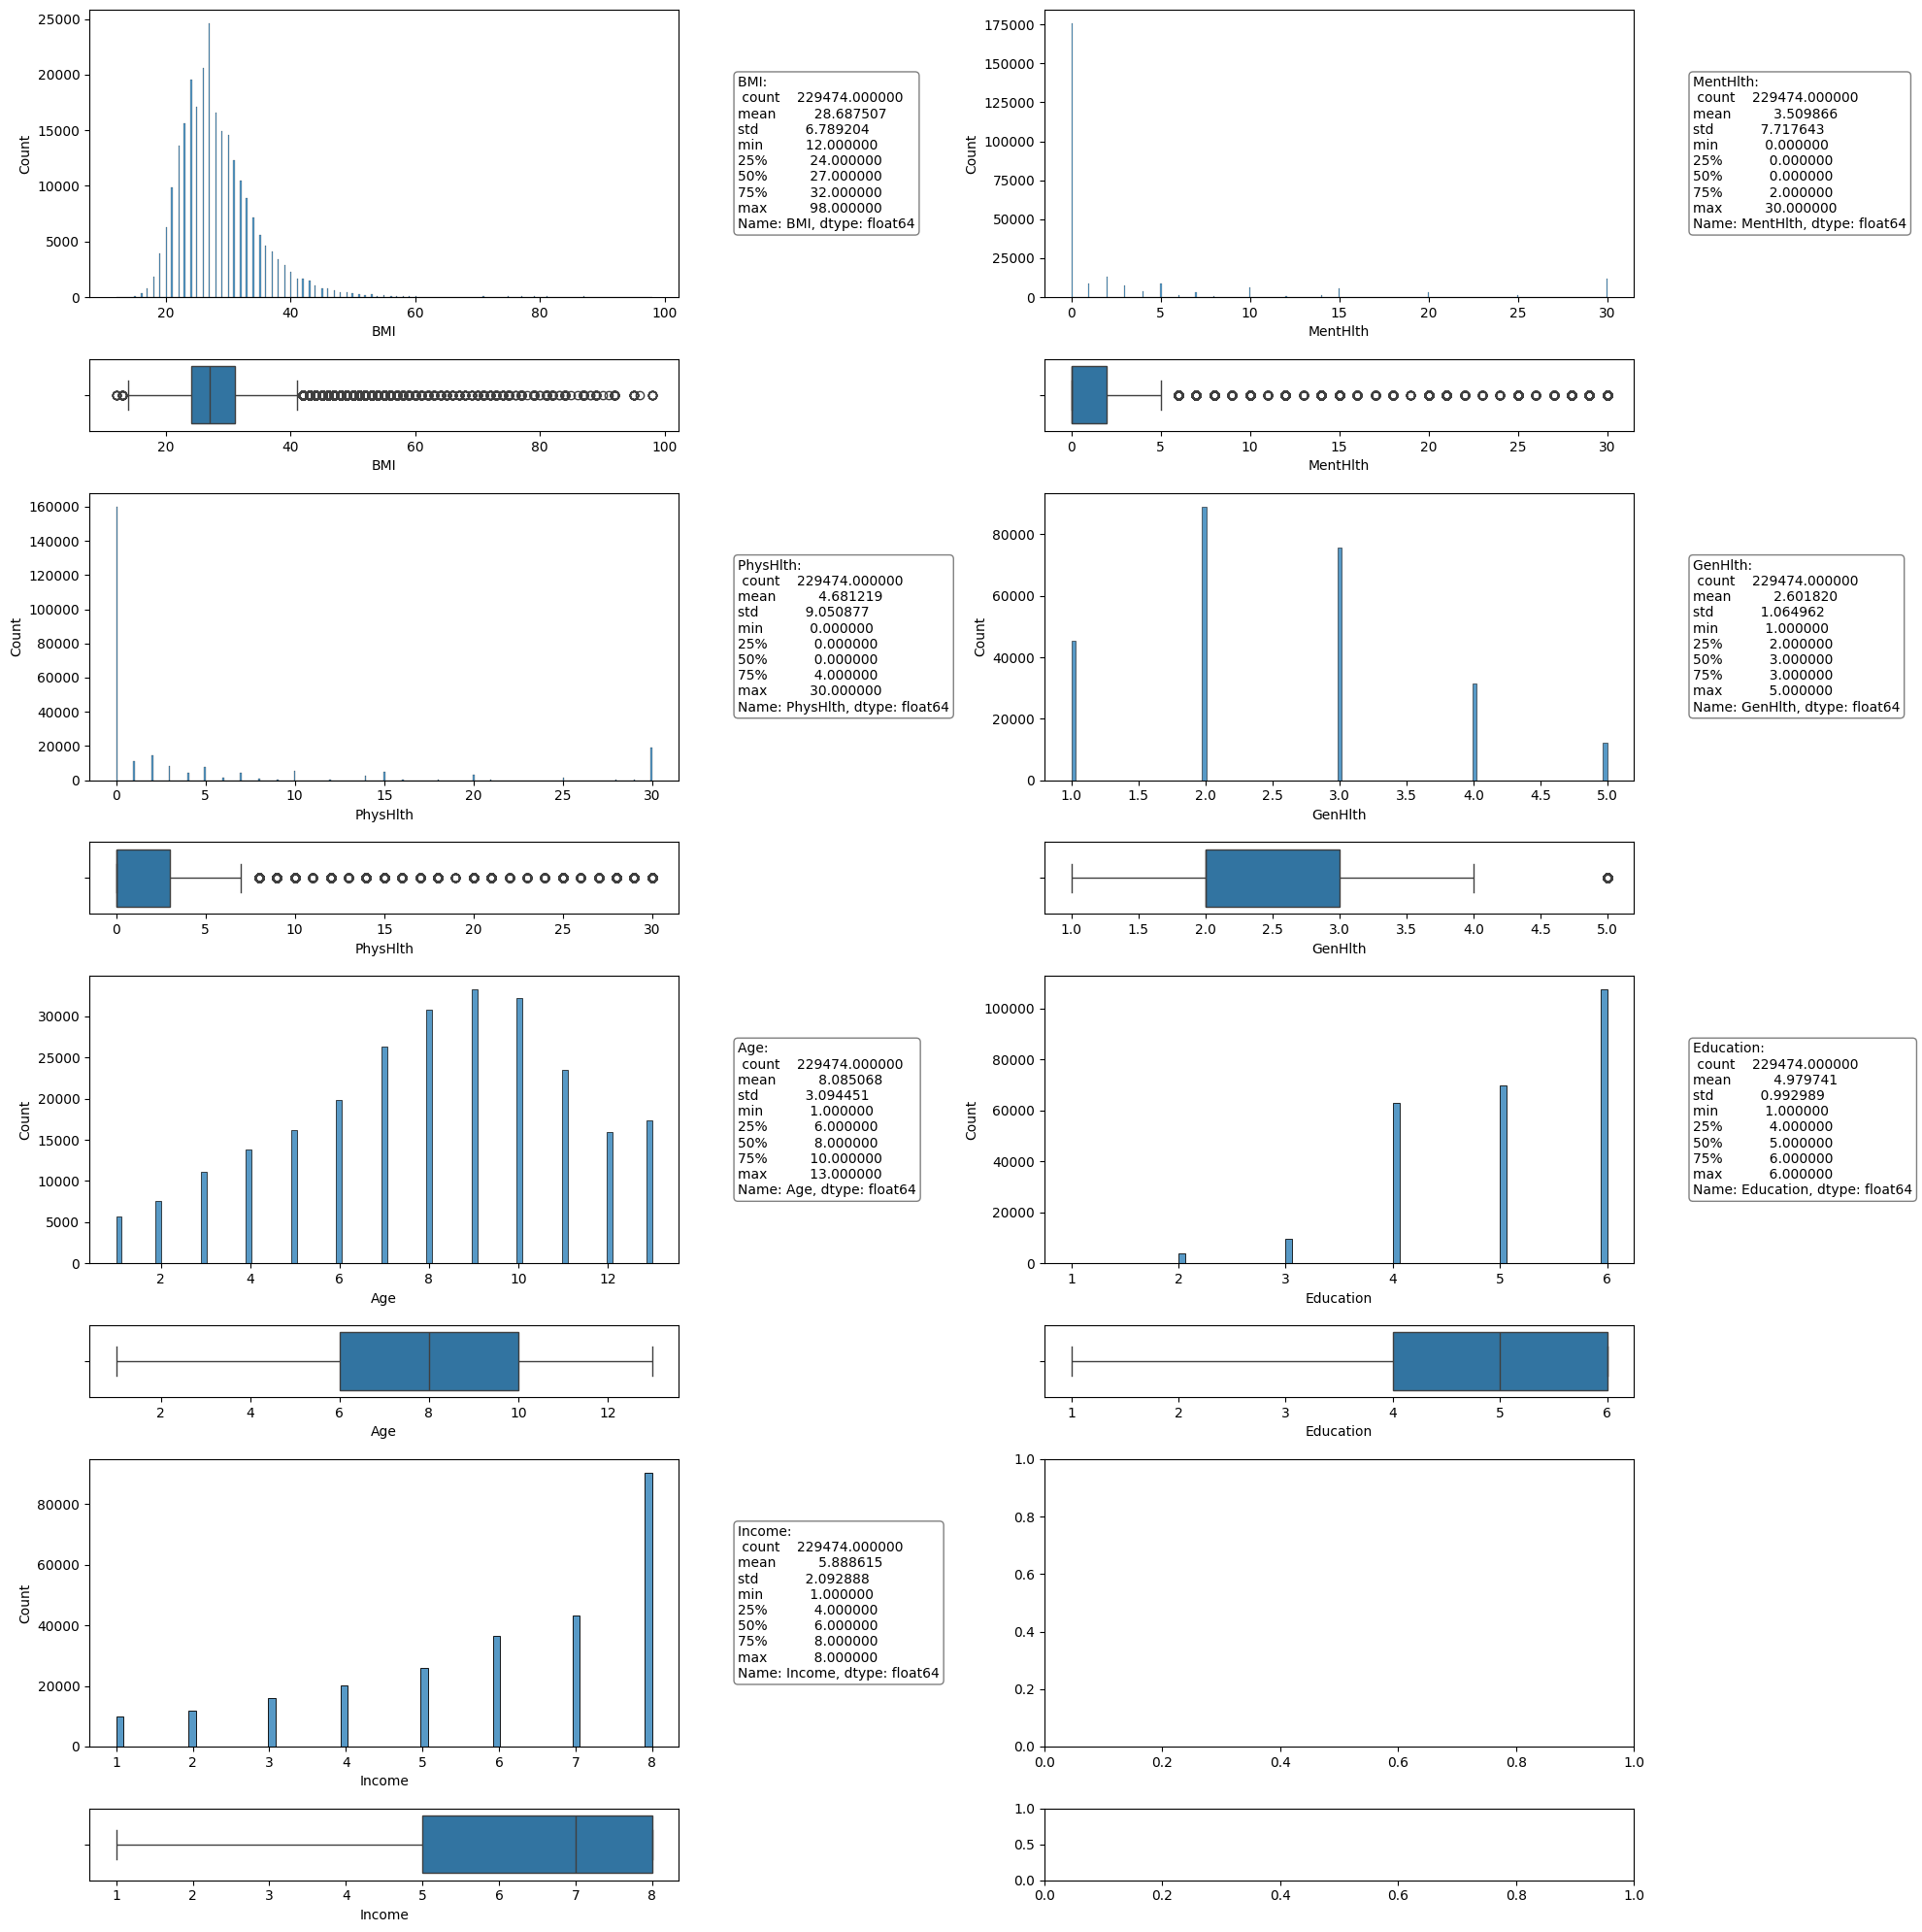

In [30]:
continuous_features = ["BMI", "MentHlth", "PhysHlth", "GenHlth", "Age", "Education", "Income"]

fig, axis = plt.subplots(8, 2, figsize = (20, 20), gridspec_kw={"height_ratios": [4, 1] * 4})

text_data = f"BMI: \n {bmi_desc}"
sns.histplot(ax = axis[0,0], data = data, x = "BMI").set(xlabel = "BMI")
sns.boxplot(ax = axis[1,0], data = data, x = "BMI").set(xlabel = "BMI")
axis[0,0].text(1.1, 0.5, text_data, transform = axis[0,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"MentHlth: \n {mentHlth_desc}"
sns.histplot(ax = axis[0,1], data = data, x = "MentHlth").set(xlabel = "MentHlth")
sns.boxplot(ax = axis[1,1], data = data, x = "MentHlth").set(xlabel = "MentHlth")
axis[0,1].text(1.1, 0.5, text_data, transform = axis[0,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"PhysHlth: \n {physHlth_desc}"
sns.histplot(ax = axis[2,0], data = data, x = "PhysHlth").set(xlabel = "PhysHlth")
sns.boxplot(ax = axis[3,0], data = data, x = "PhysHlth").set(xlabel = "PhysHlth")
axis[2,0].text(1.1, 0.5, text_data, transform = axis[2,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"GenHlth: \n {genHlth_desc}"
sns.histplot(ax = axis[2,1], data = data, x = "GenHlth").set(xlabel = "GenHlth")
sns.boxplot(ax = axis[3,1], data = data, x = "GenHlth").set(xlabel = "GenHlth")
axis[2,1].text(1.1, 0.5, text_data, transform = axis[2,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Age: \n {age_desc}"
sns.histplot(ax = axis[4,0], data = data, x = "Age").set(xlabel = "Age")
sns.boxplot(ax = axis[5,0], data = data, x = "Age").set(xlabel = "Age")
axis[4,0].text(1.1, 0.5, text_data, transform = axis[4,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Education: \n {education_desc}"
sns.histplot(ax = axis[4,1], data = data, x = "Education").set(xlabel = "Education")
sns.boxplot(ax = axis[5,1], data = data, x = "Education").set(xlabel = "Education")
axis[4,1].text(1.1, 0.5, text_data, transform = axis[4,1].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

text_data = f"Income: \n {income_desc}"
sns.histplot(ax = axis[6,0], data = data, x = "Income").set(xlabel = "Income")
sns.boxplot(ax = axis[7,0], data = data, x = "Income").set(xlabel = "Income")
axis[6,0].text(1.1, 0.5, text_data, transform = axis[6,0].transAxes, fontsize = 10, verticalalignment = "center", bbox = dict(boxstyle = "round", facecolor = "white", edgecolor="gray"))

plt.tight_layout()

path = "../data/processed"
os.makedirs(path, exist_ok=True)
plt.savefig(f"{path}/no_applied_outliers.jpg")

plt.show()

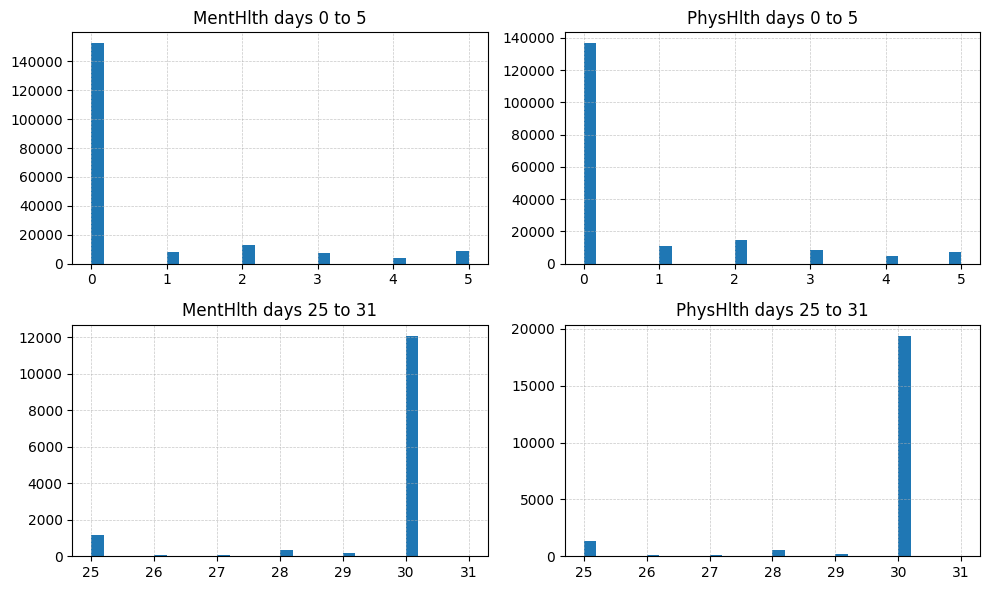

In [31]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))

axis[0,0].hist(data_cleaned["MentHlth"], bins=30, range=(0, 5))
axis[0,0].set_title("MentHlth days 0 to 5")
axis[0,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

axis[0,1].hist(data_cleaned["PhysHlth"], bins=30, range=(0, 5))
axis[0,1].set_title("PhysHlth days 0 to 5")
axis[0,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

axis[1,0].hist(data_cleaned["MentHlth"], bins=30, range=(25, 31))
axis[1,0].set_title("MentHlth days 25 to 31")
axis[1,0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

axis[1,1].hist(data_cleaned["PhysHlth"], bins=30, range=(25, 31))
axis[1,1].set_title("PhysHlth days 25 to 31")
axis[1,1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
print("MentHlth = 0:", (data_cleaned["MentHlth"] == 0).sum())
print("MentHlth = 30:", (data_cleaned["MentHlth"] == 30).sum(), "\n")

print("PhysHlth = 0:", (data_cleaned["PhysHlth"] == 0).sum())
print("PhysHlth = 30:", (data_cleaned["PhysHlth"] == 30).sum())

MentHlth = 0: 152325
MentHlth = 30: 12079 

PhysHlth = 0: 136578
PhysHlth = 30: 19385


(array([1.52325e+05, 0.00000e+00, 0.00000e+00, 8.30700e+03, 0.00000e+00,
        0.00000e+00, 1.26920e+04, 0.00000e+00, 0.00000e+00, 7.30100e+03,
        0.00000e+00, 0.00000e+00, 3.77400e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 8.91300e+03, 0.00000e+00, 0.00000e+00, 9.88000e+02,
        0.00000e+00, 0.00000e+00, 3.09000e+03, 0.00000e+00, 0.00000e+00,
        6.39000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 9.10000e+01,
        0.00000e+00, 0.00000e+00, 6.35200e+03, 0.00000e+00, 0.00000e+00,
        4.10000e+01, 0.00000e+00, 0.00000e+00, 3.98000e+02, 0.00000e+00,
        0.00000e+00, 4.10000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.16700e+03, 0.00000e+00, 0.00000e+00, 5.50100e+03, 0.00000e+00,
        0.00000e+00, 8.80000e+01, 0.00000e+00, 0.00000e+00, 5.40000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 9.70000e+01, 0.00000e+00,
        0.00000e+00, 1.60000e+01, 0.00000e+00, 0.00000e+00, 3.36200e+03,
        0.00000e+00, 0.00000e+00, 2.27000e+02, 0.00

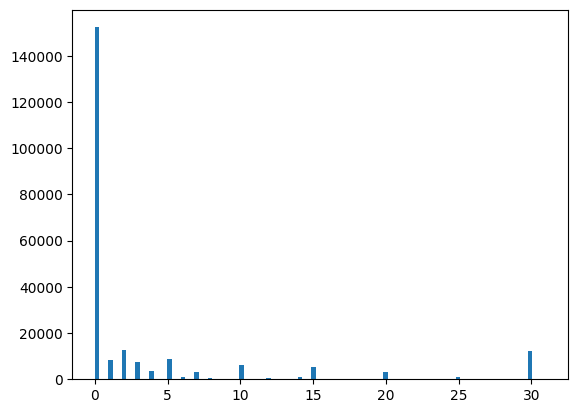

In [33]:
plt.hist(data_cleaned["MentHlth"], bins=100, range=(0, 31))

(array([1.36578e+05, 0.00000e+00, 0.00000e+00, 1.10730e+04, 0.00000e+00,
        0.00000e+00, 1.44910e+04, 0.00000e+00, 0.00000e+00, 8.43500e+03,
        0.00000e+00, 0.00000e+00, 4.52100e+03, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.59500e+03, 0.00000e+00, 0.00000e+00, 1.32800e+03,
        0.00000e+00, 0.00000e+00, 4.53100e+03, 0.00000e+00, 0.00000e+00,
        8.09000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.79000e+02,
        0.00000e+00, 0.00000e+00, 5.58800e+03, 0.00000e+00, 0.00000e+00,
        6.00000e+01, 0.00000e+00, 0.00000e+00, 5.78000e+02, 0.00000e+00,
        0.00000e+00, 6.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.58400e+03, 0.00000e+00, 0.00000e+00, 4.91400e+03, 0.00000e+00,
        0.00000e+00, 1.12000e+02, 0.00000e+00, 0.00000e+00, 9.60000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.52000e+02, 0.00000e+00,
        0.00000e+00, 2.20000e+01, 0.00000e+00, 0.00000e+00, 3.27300e+03,
        0.00000e+00, 0.00000e+00, 6.63000e+02, 0.00

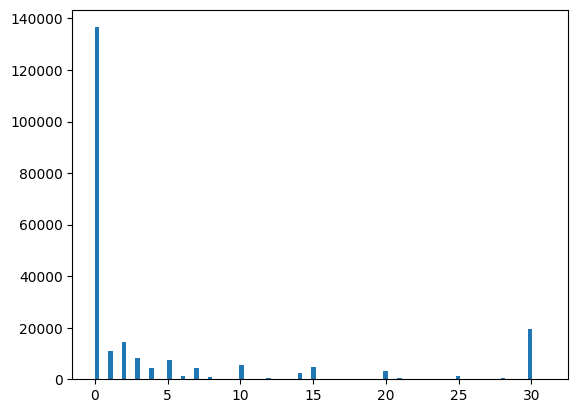

In [34]:
plt.hist(data_cleaned["PhysHlth"], bins=100, range=(0, 31))

#### Outliers interpretation
Back to [Deep Dive part II](#deep-dive-part-ii)

1. **Body Mass Index (BMI)**
    - Values > 50 indicate rare but real cases of extreme obesity

2. **Mental heath (MentHlth)** 
    - MentHlth = 0
        - A huge majority reported no days of poor mental health in the past 30 days. 
        - Count ≈ 152,325 → ~66.3% of the data.
    - MentHlth = 30 (max)
        - Probably a psychological or interface spike: some respondents pick the “worst” score when overwhelmed or unsure.
        - Count = 12,079 → 5.25% of the data.

3. **Physical health (PhysHlth)**
    - PhysHlth = 0
        - A dominant majority report no days of physical unhealthiness — this is consistent with how the general population perceives physical wellness.
        - Count ≈ 136,578 → ≈59.5% of the data.
    - PhysHlth = 30 (max)
        - It’s likely a mix of severe health cases and some “I feel awful” generalization responses.
        - Count = 19,385 → ≈8.45% of the data.

Both **MentHlth** and **PhysHlth** show a behavioral pattern in self-reported health data.

#### Handling outliers
Back to [Deep Dive part II](#deep-dive-part-ii)

We'll bin **MentHlth** and **PhysHlth** given the spikes at 0 and 30 that consist in most of the values in each feature. 

Binning plan:

| Encoded value | Bin Label | Value Range | Representation |
|---------------|-----------|-------------|----------------|
| 0             | Excellent | 0           | No days of poor health |
| 1             | Mild      | 1-5         | Occasional issue |
| 2             | Moderate  | 6-15        | Recurring symptoms |
| 3             | Severe    | 16-29       | Chronic discomfort |
| 4             | Maximum   | 30          | Max self-report / major outlier |

In [35]:
def bin_health_days(x):
    if x == 0:
        return 0
    elif 1 <= x <= 5:
        return 1
    elif 6 <= x <= 15:
        return 2
    elif 16 <= x <= 29:
        return 3
    elif x == 30:
        return 4

# Apply binning
data_cleaned.loc[:, "MentHlth_Bin"] = data_cleaned["MentHlth"].apply(bin_health_days)
data_cleaned.loc[:, "PhysHlth_Bin"] = data_cleaned["PhysHlth"].apply(bin_health_days)

# Confirm transformation
print(data_cleaned[["MentHlth", "MentHlth_Bin", "PhysHlth", "PhysHlth_Bin"]].sample(10))
print("\nMentHlth_Bin distribution:\n", data_cleaned["MentHlth_Bin"].value_counts())
print("\nPhysHlth_Bin distribution:\n", data_cleaned["PhysHlth_Bin"].value_counts())

        MentHlth  MentHlth_Bin  PhysHlth  PhysHlth_Bin
49516        0.0             0       3.0             1
245587       0.0             0       3.0             1
234239       0.0             0       0.0             0
25771        0.0             0       0.0             0
202777      10.0             2       0.0             0
5204         0.0             0       0.0             0
103748       5.0             1       2.0             1
31256        2.0             1       4.0             1
109760      30.0             4       0.0             0
2296         0.0             0      30.0             4

MentHlth_Bin distribution:
 MentHlth_Bin
0    152325
1     40987
2     18308
4     12079
3      5775
Name: count, dtype: int64

PhysHlth_Bin distribution:
 PhysHlth_Bin
0    136578
1     46115
2     20639
4     19385
3      6757
Name: count, dtype: int64


/tmp/ipykernel_572/1330239477.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, "MentHlth_Bin"] = data_cleaned["MentHlth"].apply(bin_health_days)
/tmp/ipykernel_572/1330239477.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.loc[:, "PhysHlth_Bin"] = data_cleaned["PhysHlth"].apply(bin_health_days)


## Model Deployment
Back to [Index](#index)

1. [Data preparation](#data-preparation)
    - [Feature and Targer separation](#feature-and-targer-separation)
    - [Standard Scaling](#standard-scaling)
2. [Logistic Regression Models](#logistic-regression-models)
    - [Logistic Regression Model I](#logistic-regression-model-i)
        - [Logistic Regression Model I training](#logistic-regression-model-i-training)
        - [Logistic Regression Model I evaluation](#logistic-regression-model-i-evaluation)
        - [Logistic Regression Model I results sumary and conclusion](#logistic-regression-model-i-results-sumary-and-conclusion)
    - [Logistic Regression Model II](#logistic-regression-model-ii)
        - [Logistic Regression Model II retraining](#logistic-regression-model-ii-retraining)
        - [Logistic Regression Model II evaluation](#logistic-regression-model-ii-evaluation)
        - [Logistic Regression Model II results sumary and conclusion](#logistic-regression-model-ii-results-sumary-and-conclusion)
4. [Tree Based Models](#tree-based-models)
    - [Random Forest Classifier](#random-forest-classifier)
        - [Random Forest Classifier training](#random-forest-classifier-training)
        - [Random Forest Classifier evaluation](#random-forest-classifier-evaluation)
        - [Random Forest Classifier results sumary and conclusion](#random-forest-classifier-results-sumary-and-conclusion)
    - [LightGBM Model](#lightgbm-model)
        - [LightGBM Model training](#lightgbm-model-training)
        - [LightGBM Model evaluation](#lightgbm-model-evaluation)
        - [LightGBM Model results sumary and conclusion](#lightgbm-model-results-sumary-and-conclusion)

### Data preparation
Back to [Model Deployment](#model-deployment)

- Target: **Diabetes_binary**
- Predictors: All relevant features including binned **MentHlth_Bin**, **PhysHlth_Bin**, and excluding **MentHlth** and **PhysHlth** raw columns.

#### Feature and Targer separation
Back to [Model Deployment](#model-deployment)

In [36]:
from sklearn.model_selection import train_test_split

features = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk", "Sex", "BMI", "GenHlth", "Age",
    "Education", "Income", "MentHlth_Bin", "PhysHlth_Bin"
]

X = data_cleaned[features]
y = data_cleaned["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#### Standard Scaling
Back to [Model Deployment](#model-deployment)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression Models
- Back to [Model Deployment](#model-deployment)

1. [Logistic Regression Model I](#logistic-regression-model-i)
    - [Logistic Regression Model I training](#logistic-regression-model-i-training)
    - [Logistic Regression Model I evaluation](#logistic-regression-model-i-evaluation)
    - [Logistic Regression Model I results sumary and conclusion](#logistic-regression-model-i-results-sumary-and-conclusion)
2. [Logistic Regression Model II](#logistic-regression-model-ii)
    - [Logistic Regression Model II retraining](#logistic-regression-model-ii-retraining)
    - [Logistic Regression Model II evaluation](#logistic-regression-model-ii-evaluation)
    - [Logistic Regression Model II results sumary and conclusion](#logistic-regression-model-ii-results-sumary-and-conclusion)

#### Logistic Regression Model I
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Models](#logistic-regression-models)

1. [Logistic Regression Model I training](#logistic-regression-model-i-training)
2. [Logistic Regression Model I evaluation](#logistic-regression-model-i-evaluation)
3. [Logistic Regression Model I results sumary and conclusion](#logistic-regression-model-i-results-sumary-and-conclusion)

##### Logistic Regression Model I training
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Model I](#logistic-regression-model-i)

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

##### Logistic Regression Model I evaluation
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Model I](#logistic-regression-model-i)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     48595
         1.0       0.54      0.15      0.24      8774

    accuracy                           0.85     57369
   macro avg       0.70      0.56      0.58     57369
weighted avg       0.82      0.85      0.81     57369

Confusion Matrix:
 [[47467  1128]
 [ 7440  1334]]
ROC AUC Score: 0.8095009110929356


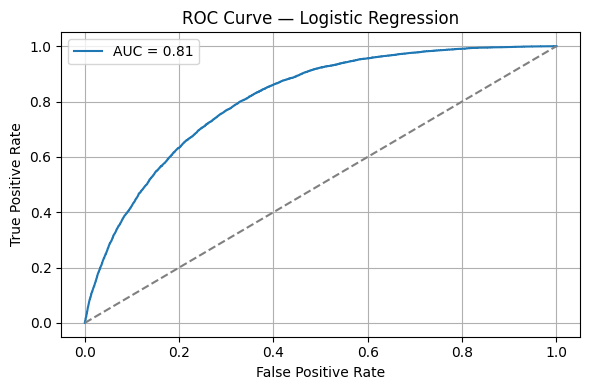

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Logistic Regression Model results sumary and conclusion
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Models](#logistic-regression-models)

Performance Metrics:

| Metric           | Value     |
|------------------|-----------|
| Accuracy         | 85.0%     |
| Precision (Class 1) | 54%   |
| Recall (Class 1) | 15%      |
| F1-score (Class 1) | 0.24    |
| ROC AUC Score    | 0.81    |

While the AUC is strong, recall for diabetics (1) is low. The model is highly conservative and often misses positive cases.

- ROC AUC of 0.81 indicates strong signal and probability ranking
- High precision means few false alarms
- Low recall suggests many diabetics go undetected
- Overall accuracy is inflated due to class imbalance

This model is retained as a reference point for comparison against future improvements. Its strength lies in ranking ability, but its threshold behavior is suboptimal for health-critical use cases.

#### Logistic Regression Model II
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Models](#logistic-regression-models)

1. [Logistic Regression Model II retraining](#logistics-regression-model-ii-retraining)
2. [Logistic Regression Model II evaluation](#logistic-regression-model-ii-evaluation)
3. [Logistic Regression Model II results sumary and conclusion](#logistic-regression-model-ii-results-sumary-and-conclusion)

##### Logistic Regression Model II retraining
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Model II](#logistic-regression-model-ii)

To improve the results we'll implement:
- class_weight="balanced"
- Threshold tuning

In [40]:
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg_balanced.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

##### Logistic Regression Model II evaluation
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Model II](#logistic-regression-model-ii)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     48595
         1.0       0.32      0.76      0.45      8774

    accuracy                           0.72     57369
   macro avg       0.63      0.73      0.63     57369
weighted avg       0.85      0.72      0.75     57369

Confusion Matrix:
 [[34380 14215]
 [ 2108  6666]]
ROC AUC Score: 0.8099157337833185


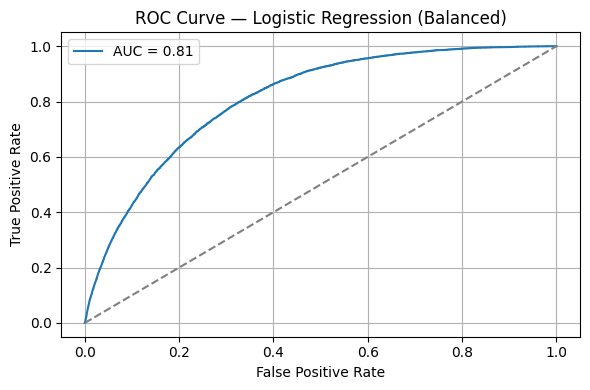

In [41]:
y_pred_bal = logreg_balanced.predict(X_test_scaled)
y_prob_bal = logreg_balanced.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_bal))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_bal)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_bal):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (Balanced)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Logistic Regression Model II results sumary and conclusion
- Back to [Model Deployment](#model-deployment)
- Back to [Logistic Regression Model II](#logistic-regression-model-ii)

After observing the first model’s strong AUC but poor recall for diabetic cases, we retrained with class_weight="balanced" to handle class imbalance.

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 72%       |
| Precision (1)  | 32%       |
| Recall (1)     | 76%       |
| F1-score (1)   | 0.45      |
| ROC AUC        | 0.81      |

- Recall for diabetics increased from 15% → 76%
- ROC AUC remained strong → model still ranks cases well
- Tradeoff: Precision dropped to 32%, and more false positives were introduced
- This model is far more suited for screening or early warning systems

Comparison to first model:

- F1-Score for Class 1 almost doubled
- Much better balance between classes
- Use case fit: Health-sensitive environments where recall matters most

### Tree Based Models
- Back to [Model Deployment](#model-deployment)

1. [Random Forest Classifier](#random-forest-classifier)
    - [Random Forest Classifier training](#random-forest-classifier-training)
    - [Random Forest Classifier evaluation](#random-forest-classifier-evaluation)
    - [Random Forest Classifier results sumary and conclusion](#random-forest-classifier-results-sumary-and-conclusion)
2. [LightGBM Model](#lightgbm-model)
    - [LightGBM Model training](#lightgbm-model-training)
    - [LightGBM Model evaluation](#lightgbm-model-evaluation)
    - [LightGBM Model results sumary and conclusion](#lightgbm-model-results-sumary-and-conclusion)

#### Random Forest Classifier
- Back to [Model Deployment](#model-deployment)
- Back to [Tree Based Models](#tree-based-models)

1. [Random Forest Classifier training](#random-forest-classifier-training)
2. [Random Forest Classifier evaluation](#random-forest-classifier-evaluation)
3. [Random Forest Classifier results sumary and conclusion](#random-forest-classifier-results-sumary-and-conclusion)

##### Random Forest Classifier training
- Back to [Model Deployment](#model-deployment)
- Back to [Random Forest Classifier](#random-forest-classifier)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=25, class_weight='balanced', random_state=42)

X_train_sample = X_train_scaled[:50000]
y_train_sample = y_train[:50000]

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=25,
                       random_state=42)

In [43]:
rf_model = RandomForestClassifier(n_estimators=25, class_weight='balanced', n_jobs=1, random_state=42)

X_train_sample = X_train_scaled[:50000]
y_train_sample = y_train[:50000]

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=25, n_jobs=1,
                       random_state=42)

##### Random Forest Classifier evaluation
- Back to [Model Deployment](#model-deployment)
- Back to [Random Forest Classifier](#random-forest-classifier)

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     48595
         1.0       0.44      0.17      0.25      8774

    accuracy                           0.84     57369
   macro avg       0.65      0.57      0.58     57369
weighted avg       0.80      0.84      0.81     57369

 Confusion Matrix:
 [[46643  1952]
 [ 7253  1521]]
 ROC AUC Score: 0.7629222220296416


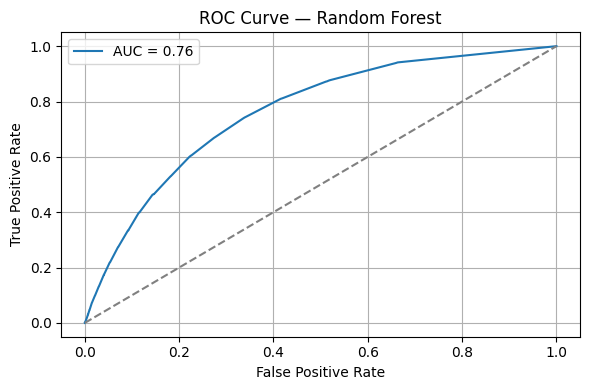

In [44]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print(" Classification Report:\n", classification_report(y_test, y_pred_rf))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(" ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_score(y_test, y_prob_rf):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Random Forest Classifier results sumary and conclusion
- Back to [Model Deployment](#model-deployment)
- Back to [Random Forest Classifier](#random-forest-classifier)

Model handled healthy individuals well but underperformed for diabetic cases.

| Metric         | Value     |
|----------------|-----------|
| Accuracy       | 84%       |
| Precision (1)  | 44%       |
| Recall (1)     | 17%       |
| F1-score (1)   | 0.25      |
| ROC AUC        | 0.76      |

- High accuracy driven by strong Class 0 (non-diabetic) performance
- Low diabetic recall → not acceptable for screening
- ROC AUC worse than logistic baseline

Random Forest is not optimal in this configuration. Logistic Regression Model II remains the more practical choice.

#### LightGBM Model
- Back to [Model Deployment](#model-deployment)
- Back to [Tree Based Models](#tree-based-models)

1. [LightGBM Model training](#lightgbm-model-training)
2. [LightGBM Model evaluation](#lightgbm-model-evaluation)
3. [LightGBM Model results sumary and conclusion](#lightgbm-model-results-sumary-and-conclusion)

##### LightGBM Model training
- Back to [Model Deployment](#model-deployment)
- Back to [LightGBM Model](#lightgbm-model)

In [50]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train_scaled, label=y_train)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': True,
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1,
    'random_state': 42
}

lgb_model = lgb.train(params, train_data, num_boost_round=100)

y_prob_lgb = lgb_model.predict(X_test_scaled)
y_pred_lgb = (y_prob_lgb >= 0.8).astype(int)

##### LightGBM Model evaluation
- Back to [Model Deployment](#model-deployment)
- Back to [LightGBM Model](#lightgbm-model)

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     48595
         1.0       0.55      0.25      0.35      8774

    accuracy                           0.85     57369
   macro avg       0.71      0.61      0.63     57369
weighted avg       0.83      0.85      0.83     57369

 Confusion Matrix:
 [[46778  1817]
 [ 6566  2208]]
 ROC AUC Score: 0.8182682571037116


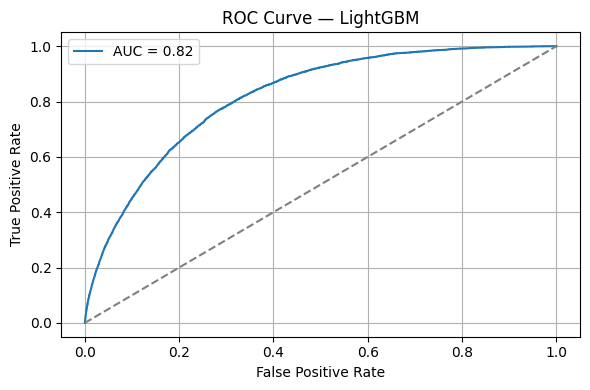

In [51]:
print(" Classification Report:\n", classification_report(y_test, y_pred_lgb))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print(" ROC AUC Score:", roc_auc_score(y_test, y_prob_lgb))

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_lgb, tpr_lgb, label=f"AUC = {roc_auc_score(y_test, y_prob_lgb):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — LightGBM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### LightGBM Model results sumary and conclusion
- Back to [Model Deployment](#model-deployment)
- Back to [LightGBM Model](#lightgbm-model)

LightGBM was deployed to emphasize recall and optimize diabetic detection rates.

| Metric         | Value   |
|----------------|---------|
| Accuracy       | 85%     |
| Precision (1)  | 55%     |
| Recall (1)     | 25%     |
| F1-score (1)   | 0.35    |
| ROC AUC        | 0.82    |

- Highest recall of all models tested — critical in health screening scenarios
- ROC AUC surpassed logistic and random forest baselines
- False positives increased — acceptable for non-invasive prediction tools

LightGBM stands as the best performer under current constraints. Its power in identifying high-risk individuals makes it ideal for early detection systems.

## Saving Chosen Model
Back to [Index](#index)

In [55]:
lgb_model.save_model("../models/lightgbm_model.lgb")

In [ ]:
print("Pickle file size (MB):", os.path.getsize("../models/lightgbm_model.lgb") / (1024 * 1024))

Pickle file size (MB): 0.34425926208496094


## Saving Scaler
Back to [Index](#index)

In [59]:
import pickle

with open("../data/processed/standard_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Saving Features
Back to [Index](#index)

In [60]:
feature_list = [
    "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack",
    "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare",
    "NoDocbcCost", "DiffWalk", "Sex", "BMI", "GenHlth", "Age",
    "Education", "Income", "MentHlth_Bin", "PhysHlth_Bin"
]

with open("../data/processed/feature_list.pkl", "wb") as f:
    pickle.dump(feature_list, f)